In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate

In [2]:
TEST_SIZE = 0.3

In [3]:
df = pd.read_excel('DataSet.xlsx')
target_item = 'MEDV'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [6]:
#calculating number of missing items in each column and proportion
key_width = 20
num_width = 8
prop_width = 10

missed_items = {}
for col in df.columns:
  missed_items[col] = df[col].isnull().sum()
for key, value in missed_items.items():
  output = f"{key.ljust(key_width)} num = {str(value).ljust(num_width)} pro = {value / df.shape[0]:.2f}"
  print(output)

CRIM                 num = 0        pro = 0.00
ZN                   num = 0        pro = 0.00
INDUS                num = 0        pro = 0.00
CHAS                 num = 26       pro = 0.05
NOX                  num = 0        pro = 0.00
RM                   num = 0        pro = 0.00
AGE                  num = 0        pro = 0.00
DIS                  num = 27       pro = 0.05
RAD                  num = 0        pro = 0.00
TAX                  num = 0        pro = 0.00
PTRATIO              num = 0        pro = 0.00
B                    num = 20       pro = 0.04
LSTAT                num = 0        pro = 0.00
MEDV                 num = 54       pro = 0.11


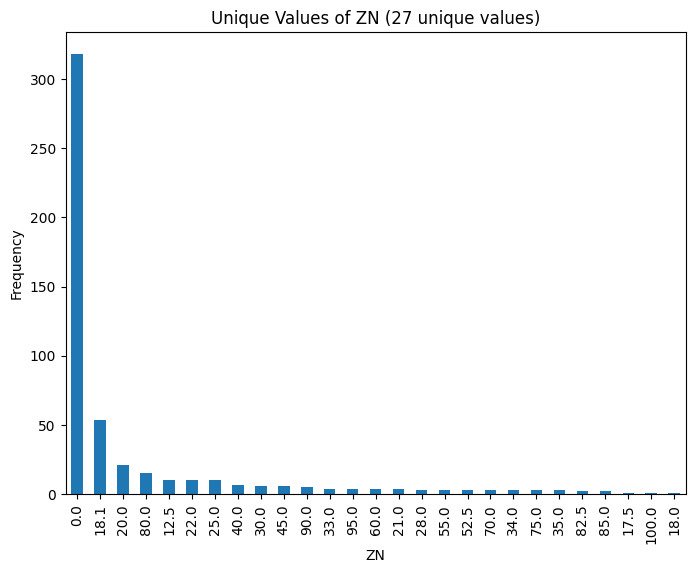

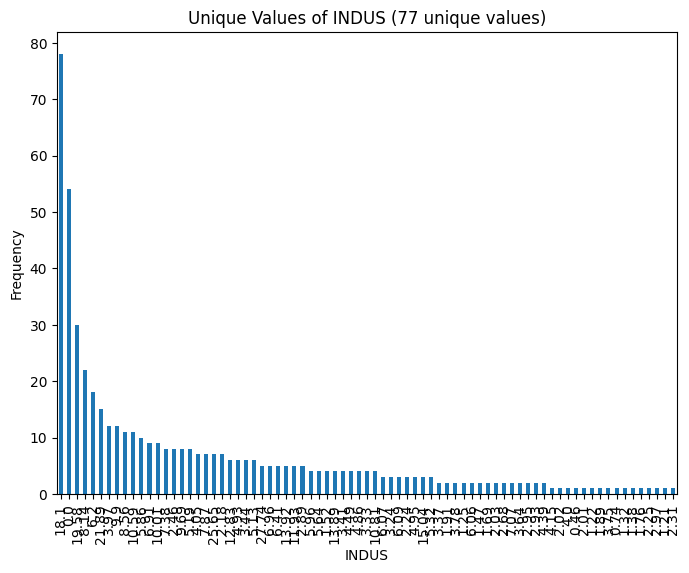

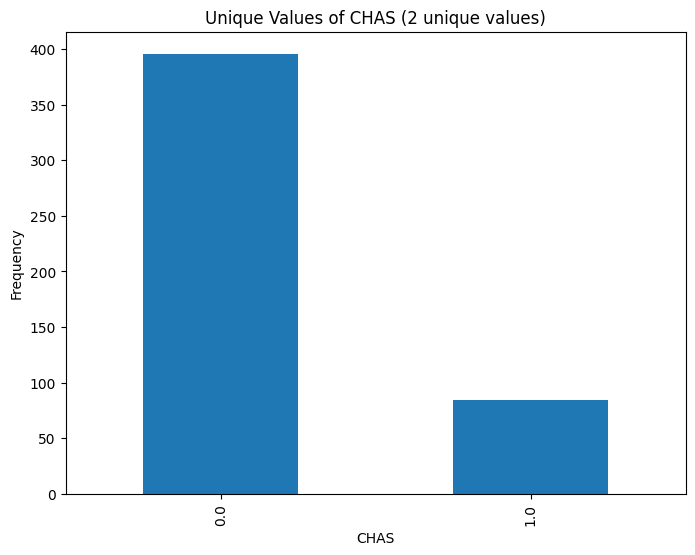

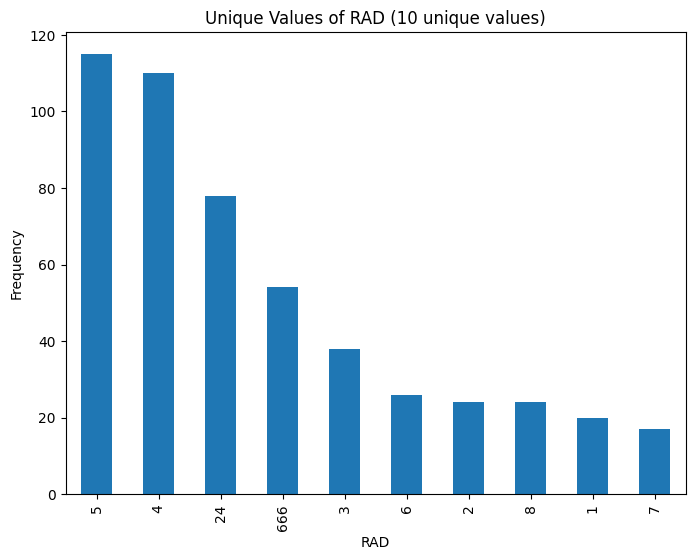

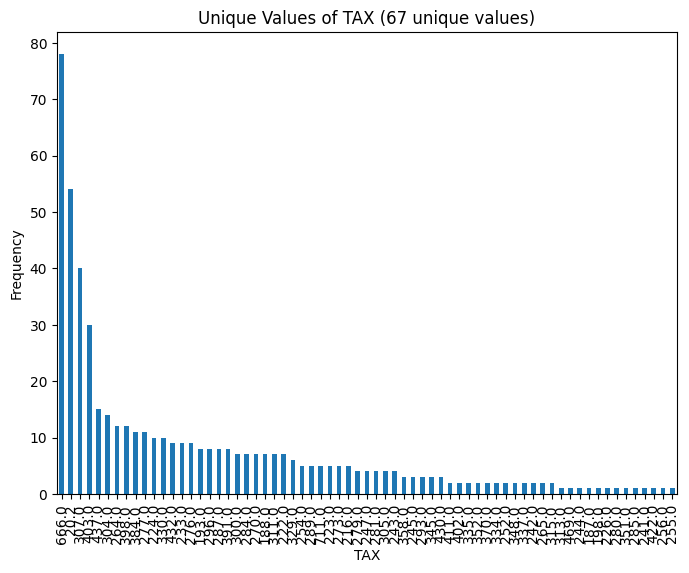

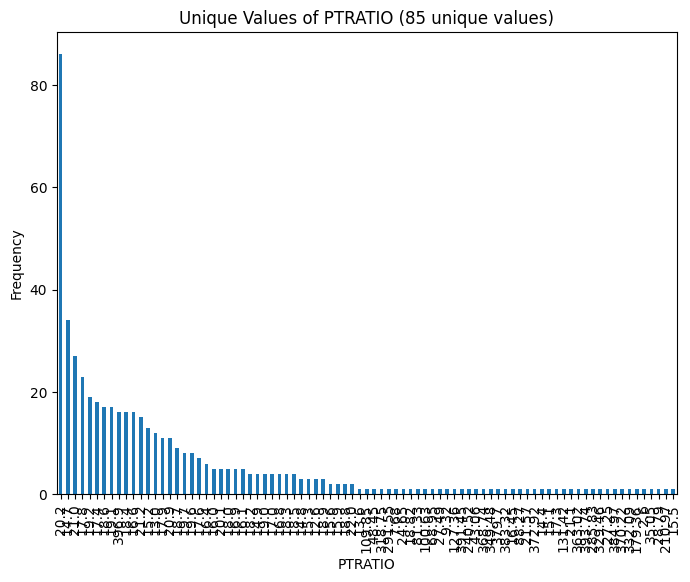

In [7]:
#calculate and show unique values of columns
import matplotlib.pyplot as plt
large_num_uniq_col = []
for col in df.columns:
  unique_values = df[col].nunique()
  if unique_values > 100:
    large_num_uniq_col.append([col, unique_values])
  else:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')

    plt.title(f'Unique Values of {col} ({unique_values} unique values)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

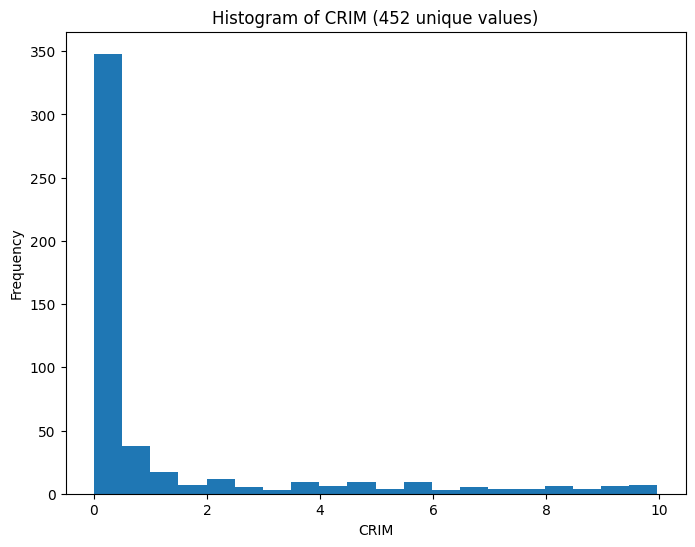

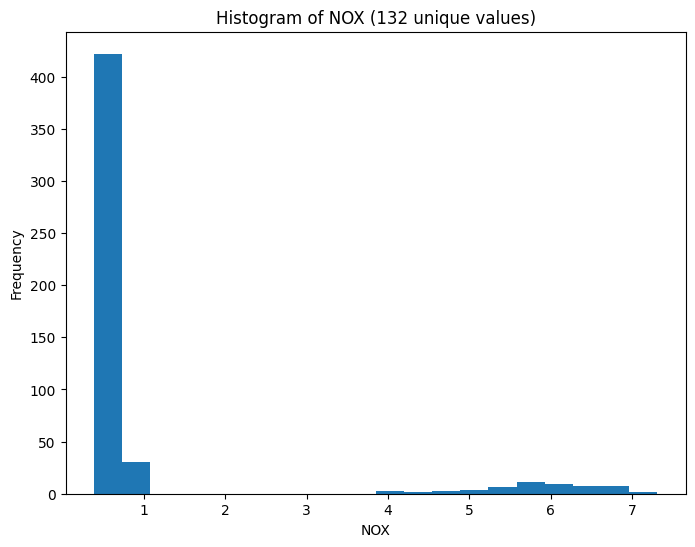

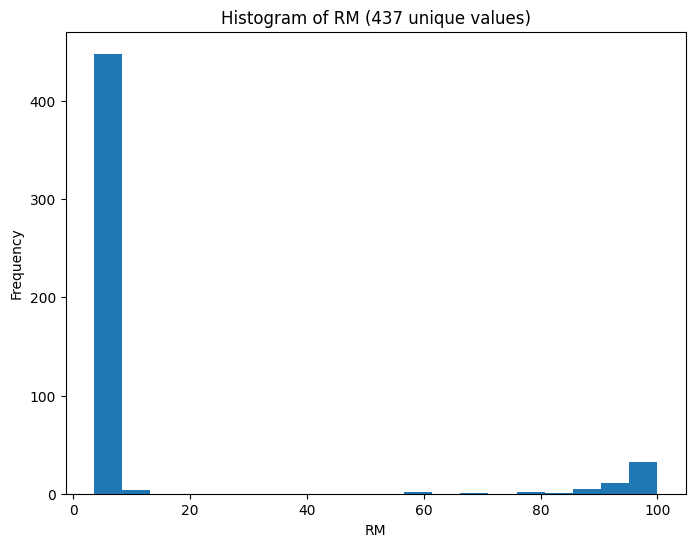

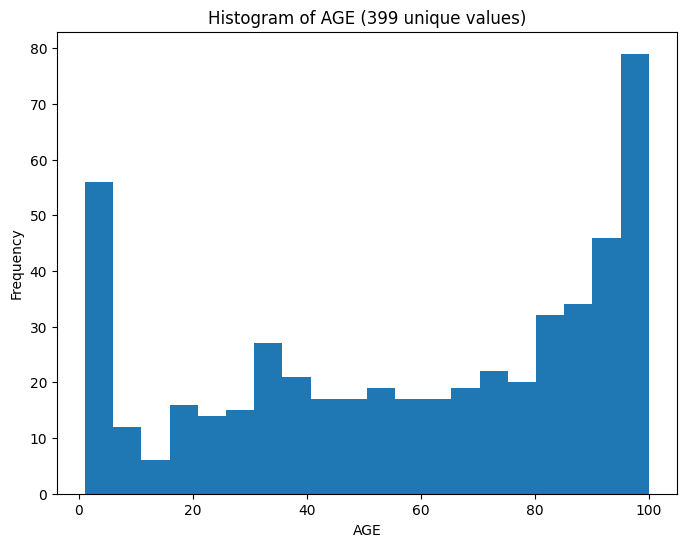

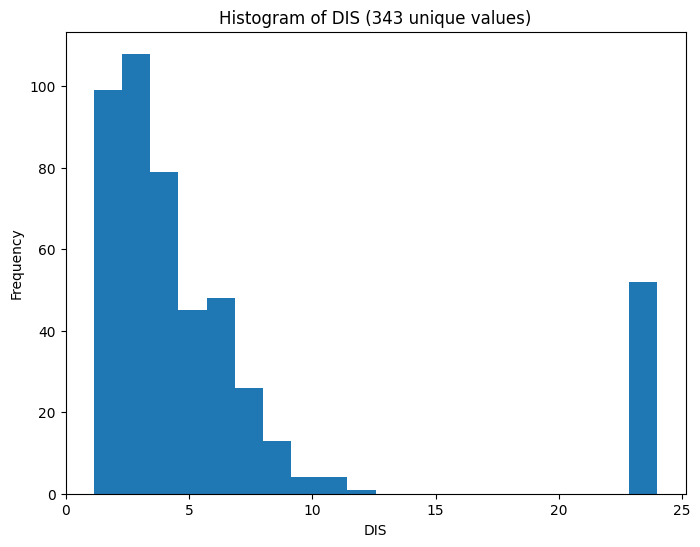

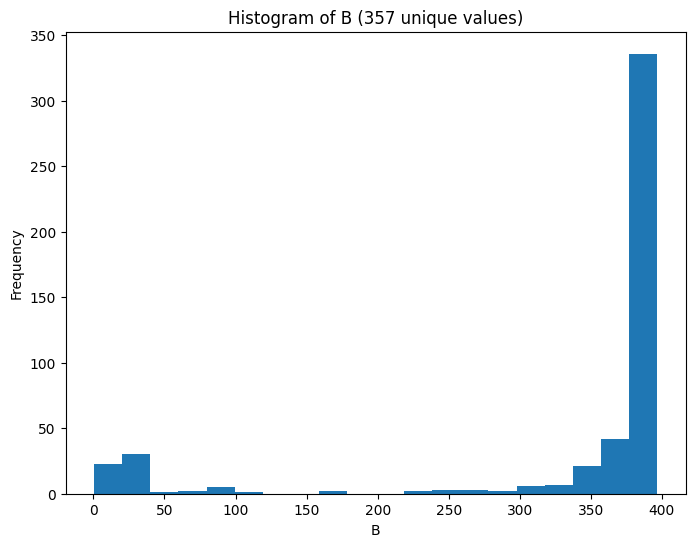

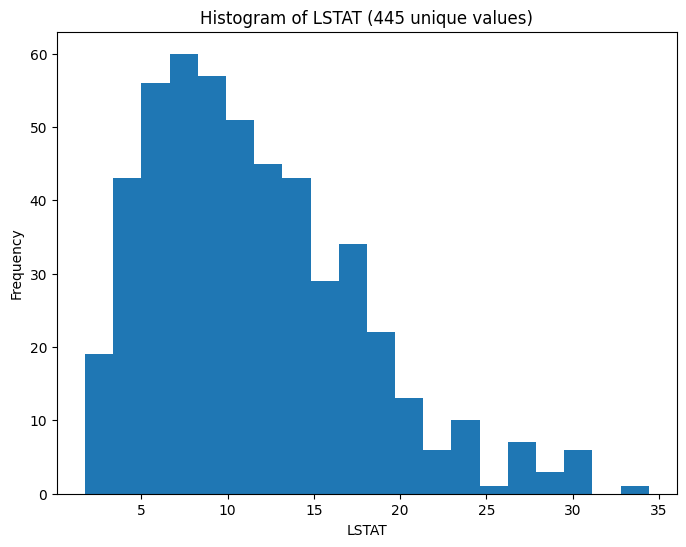

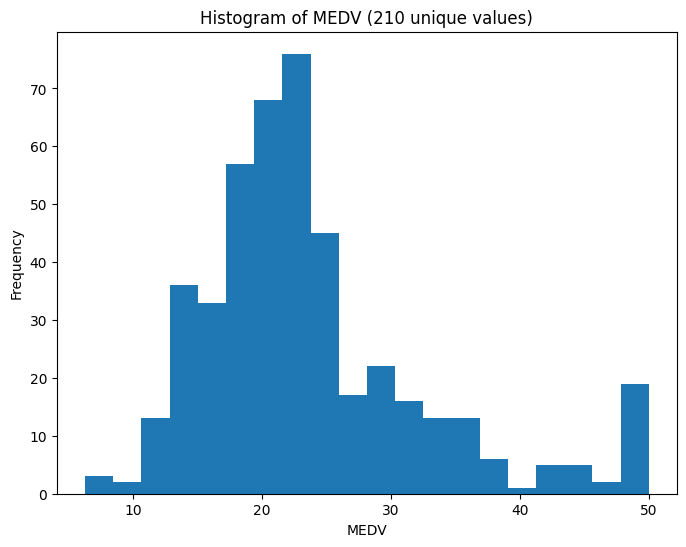

In [8]:
for col, num_unique in large_num_uniq_col:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=20)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {col} ({num_unique} unique values)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

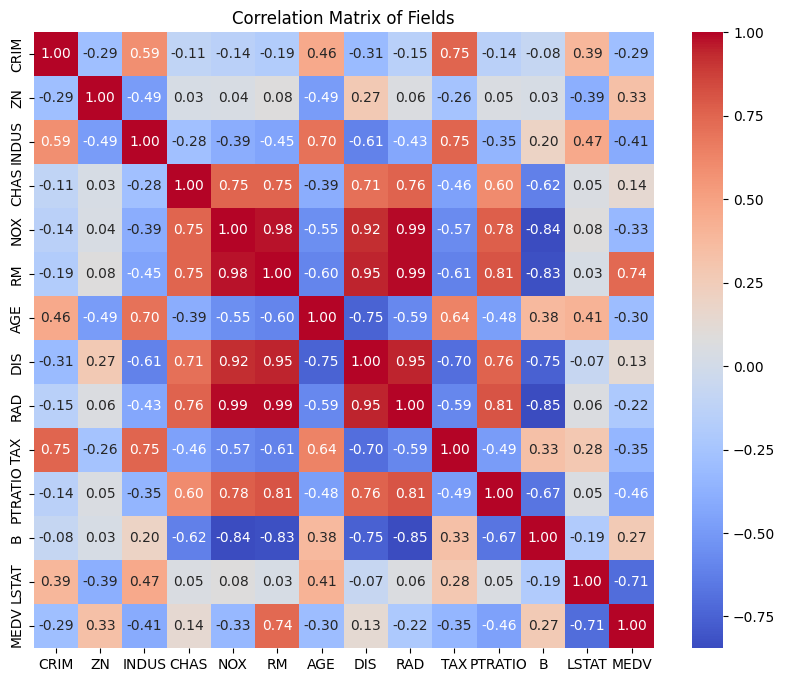

In [9]:
import seaborn

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Fields')
plt.show()

**Question 4**

Here I create a correlation matrix plot because we work with numerical data.
These visualizations provide a graphical representation of the relationships between different fields in our dataset.


Heatmap represents the correlation coefficient between two fields, with values closer to 1 indicating strong positive correlation, values closer to -1 indicating strong negative correlation, and values around 0 indicating little to no correlation.

<p dir=rtl>
با توجه به نمودار رسم شده از وابستگی متغیر ها به یکدیگر بیشترین وابستگی را متغیر RM به هدف دارد و پس از آن متغیر های ZN, B نسبت به دیگر متغیر ها وابستگی بیشتری به این متغیر دارند.
</p>

**Question 5**

*  **scatter**: A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

*  **hexbin**: Hexbin plots are useful for visualizing data sets with a large number of data points, as they can help to reveal patterns and relationships in the data that may not be apparent in a traditional scatter plot.By aggregating the data into hexagonal bins, hexbin plots can also help to reduce overplotting, where the individual data points overlap and obscure one another.

In [10]:
def scatter_plotter(item1, item2, name1, name2):
  plt.figure(figsize=(8, 6))
  plt.scatter(item1, item2)
  plt.xlabel(name1)
  plt.ylabel(name2)
  title = 'Scatter Plot of '+ name1 + ' vs ' + name2
  plt.title(title)
  plt.grid(True)
  plt.show()

def hexbin_plotter(item1, item2, name1, name2):
  plt.figure(figsize=(8, 6))
  plt.hexbin(item1, item2, gridsize=20, cmap='inferno')
  plt.xlabel(name1)
  plt.ylabel(name2)
  title = 'Hexbin Plot of ' + name1 + ' vs ' + name2
  plt.title(title)
  plt.colorbar(label='count in bin')
  plt.show()

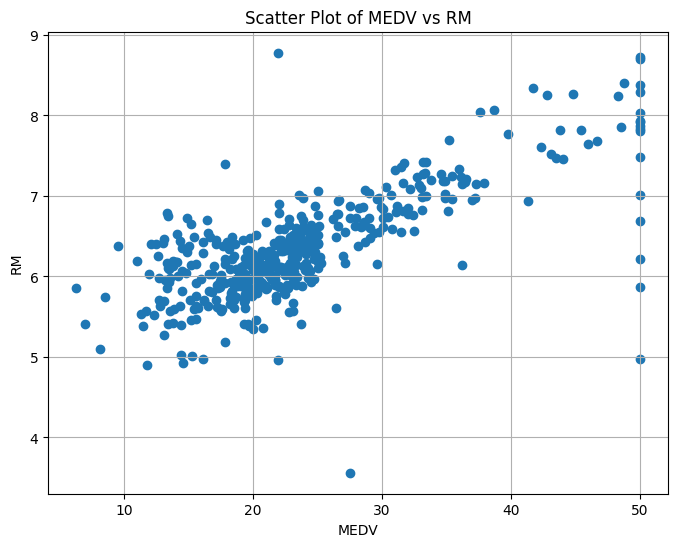

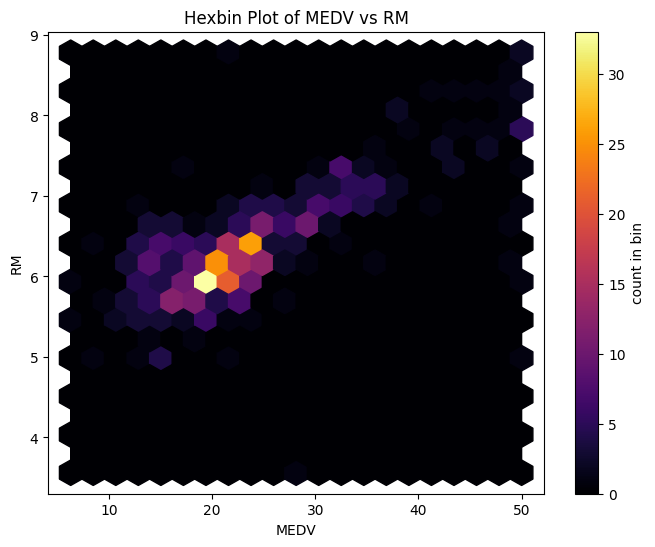

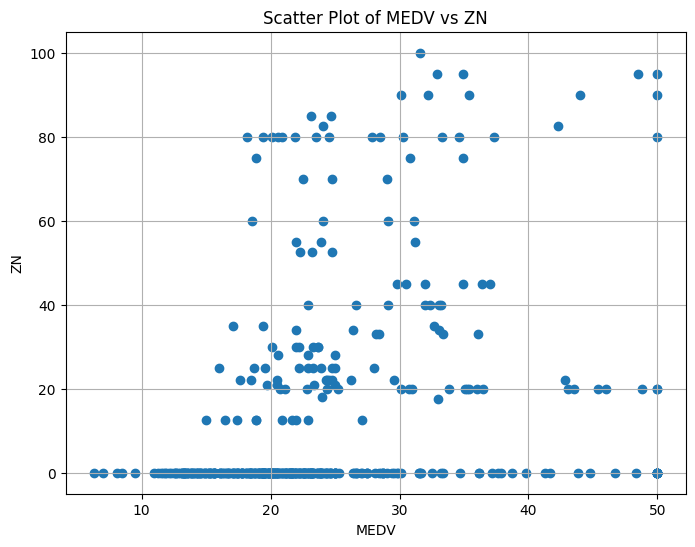

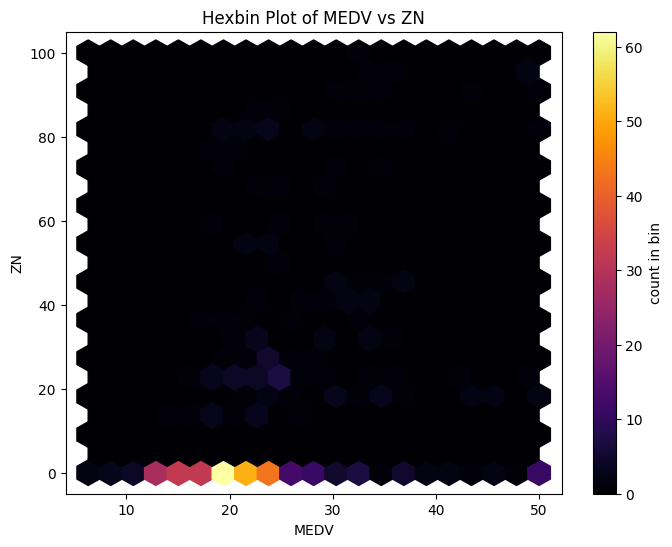

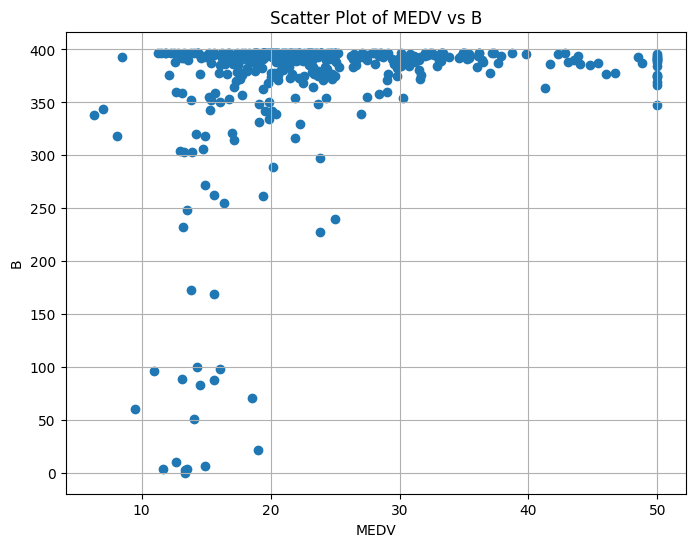

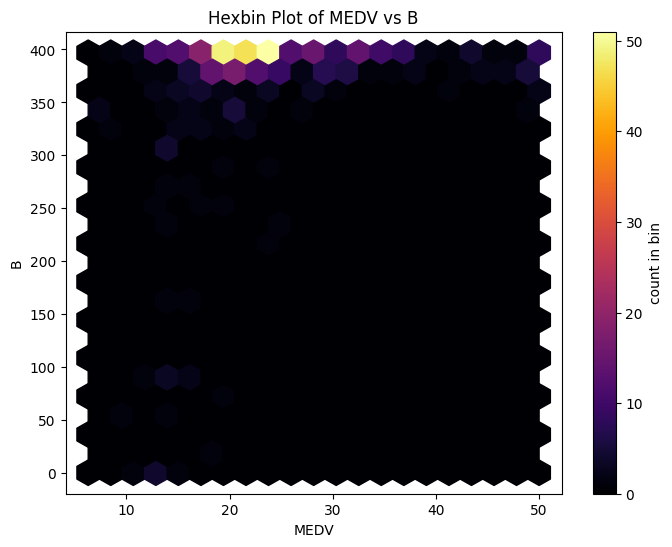

In [11]:
correlation_with_target = correlation_matrix[target_item]
correlation_with_target = correlation_with_target.drop(target_item).sort_values(ascending=False)

three_most_correlated = [correlation_with_target.index[0], correlation_with_target.index[1], correlation_with_target.index[2]]
for item in three_most_correlated:
  # print(df[target_item])
  # print(df[item])
  scatter_plotter(df[target_item], df[item], target_item, item)
  hexbin_plotter(df[target_item], df[item], target_item, item)

**Question 7**

An other things that can be done here as data analysing is to detect outliers.we have two categories of outliers,(outliers) and (extreme outliers) that normally extreme outliers are more important than outliers and sometimes we ignore outliers.

outlier -> coef = 1.5

extreme_outlier -> coef = 3

In [12]:
def outliers_and_extreme_outliers_detector(item, coef):
  Q1 = np.percentile(item, 25)
  Q3 = np.percentile(item, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - coef * IQR
  upper_bound = Q3 + coef * IQR
  outliers = (item < lower_bound) | (item > upper_bound)
  num_outliers = outliers.sum()
  return num_outliers

item_and_outliers = []
for item in df.columns:
  num_of_outliers = outliers_and_extreme_outliers_detector(df[item], 1.5)
  num_of_extreme_outliers = outliers_and_extreme_outliers_detector(df[item], 3)
  temp_dict = {'Var' : item, 'num_of_outliers': num_of_outliers, 'num_of_ext_out': num_of_extreme_outliers}
  item_and_outliers.append(temp_dict)
columns = ['Var', 'num_of_outliers', 'num_of_ext_out']
table_data = [[row[col] for col in columns] for row in item_and_outliers]
print(tabulate(table_data, headers=columns))

Var        num_of_outliers    num_of_ext_out
-------  -----------------  ----------------
CRIM                    96                79
ZN                      45                32
INDUS                    0                 0
CHAS                     0                 0
NOX                     54                54
RM                      58                54
AGE                      0                 0
DIS                      0                 0
RAD                     54                54
TAX                    137                 0
PTRATIO                 50                45
B                        0                 0
LSTAT                   14                 0
MEDV                     0                 0


**Question 7**

*  **Mean/Median Imputation**:Mean and median imputations are respectively used to replace missing values of a given column with the mean and median of the non-missing values in that column.

Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.

*  **Data dropping**:One method for handling missing values is to remove rows that have missing values.but using this approach can lead to information loss, which can introduce bias to the final dataset.

for this we can use:

1) dropna(): drops all the rows with missing values.

2) dropna(thresh = minimum_value): drop rows based on a threshold. This strategy sets a minimum number of missing values required to preserve the rows.

3)dropna(axis = 1): drops all the columns with missing values.

*  **Random Sample Imputation**:

  First, it starts by creating two subsets from the original data.

  The first subset contains all the observations without missing data, and the second one contains those with missing data.

  Then, it randomly selects from each subset a random observation.

  Furthermore, the missing data from the previously selected observation is replaced with the existing ones from the observation having all the data available.
  
  Finally, the process continues until there is no more missing information.


In [13]:
#delete rows with missing data
# df_miss_in_rows = df.dropna()
df = df.dropna(subset=['MEDV'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     428 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      427 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        440 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [14]:
#filling missing values by means of their column
df_fill_by_mean = df.fillna(df.mean())
df_fill_by_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [15]:
#filling missing data by random sample imputation method
def random_sample_imputation(column):
  non_miss = column.dropna()
  num_of_miss = column.isnull().sum()
  imputed_values = np.random.choice(non_miss, size=num_of_miss, replace=True)
  imputed_values = pd.Series(imputed_values, index=column.index[column.isnull()])

  return imputed_values
df_fill_by_rd_sp = df.apply(lambda column: column.fillna(random_sample_imputation(column)) if column.dtype != 'O' else column)
df_fill_by_rd_sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


**Question 8**
<p dir=rtl>بطور کلی امکان حذف برخی ستون ها در یک دیتاست وجود دارد و می تواند علت های مختلفی داشته باشدو یکی از این دلایل می تواند به همین missing value ها مرتبط باشد بطوریکه اگر درصد missingg value ها در یک column از یک حدی بیشتر شود، می توانیم آن ستون را حذف کنیم تا از ایجاد bias  در تحلیلمان دوری کنیم.

علاوه بر این، گاهی اوقات با توجه به تعریفی که از مسئله ارائه شده و مدلی که ما میخواهیم آن را گسترش دهیم، برخی از ستون ها اطلاعات مفیدی در اختیار ما قرار نمی دهند به همین دلیل می توانیم آن ها را حذف کنیم و نادیده بگیریم.

بطور کلی حذف یک ستون از یک دیتاست بستگی به شرایط مسئله و تعریف مسئله دارد.
</p>

**Question 9**
*  **Categorical data** can be put in groups or categories using names or labels. This grouping is typically generated using a matching procedure based on data attributes and similarities between these qualities.

*  **Numerical data**: Data expressed in numerical terms rather than in natural language descriptions are called numerical data. It can only be gathered in numerical form, keeping its name. This numerical data type also referred to as quantitative data can be used to measure a person’s height, weight, IQ, etc.


<p dir=rtl>
با توجه به توضیحات داده شده در صورت پروژه و علاوه بر آن با توجه به نمدار های رسم شده در بخش های قبلی میتوان
فهمید که در اینجا همه ویژگی ها عددی هستند ولی علاوه بر آن از طریق قطعه کد زیر نیز این مورد نشان داده شده است. البته میتوان اینگونه نیز تعبیر کرد که متغیر های RAD و CHAS می توانند بعنوان ویژگی های categorical در نظر رفته شوند از آن جهت که تعداد داد های متمایزشان محدود است.
</p>

In [16]:
data_types_of_col = df.dtypes

categorical_col = data_types_of_col[data_types_of_col == 'object'].index.tolist()
numerical_col = data_types_of_col[data_types_of_col != 'object'].index.tolist()

print(categorical_col)
print(numerical_col)

[]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


**Question 10**

* **Normalization** enables us to alter the values of numerical columns in the dataset to a standard scale.

Normalization is the method used to arrange the data in a database. It is a scaling method that reduces duplication in which the numbers are scaled and moved between 0 and 1.

One technique to process data to produce easily comparable findings within and across several data sets is the normalization procedure. Anyone reading data can benefit from it, but those using machine learning and significant amounts of data may find it most regularly helpful.

*  **Standardization** Standardization, often referred to as z-score Normalization, occasionally is a method for rescaling the values that meet the characteristics of the standard normal distribution while being similar to normalizing.

When the algorithms don't make any assumptions about the distribution of the data, Normalization is taken into account. When algorithms create predictions about the data distribution, standardization is applied.To develop a more robust machine learning model, normalization and standardization are crucial concepts.Standardization is divided by the standard deviation after the mean has been subtracted. Data is transformed into a range between 0 and 1 by normalization, which involves dividing a vector by its length.When your data have different dimensions and the method you're employing, like k-nearest neighbors or artificial neural networks, doesn't make assumptions about the distribution of your data, normalization is helpful. Standardization presupposes that the distribution of your data is Gaussian.

<p dir=rtl>
با توجه به اطلاعاتی که کسب کردم اعمال این دو اقدام بستگی به چند مولفه دارد که دو تا از مهم ترین آنها یکی از آنها نوع الگوریتم های machine learning هست که می خواهیم استفاده کنیم و دیگری توزیع features  و پراکندگی آنها ... در ابتدا من از standardization استفاده میکنم و در ادامه در صورت نیاز یااثر آن را از بین می برم یا از normalization استفاده می کنم.
</p>

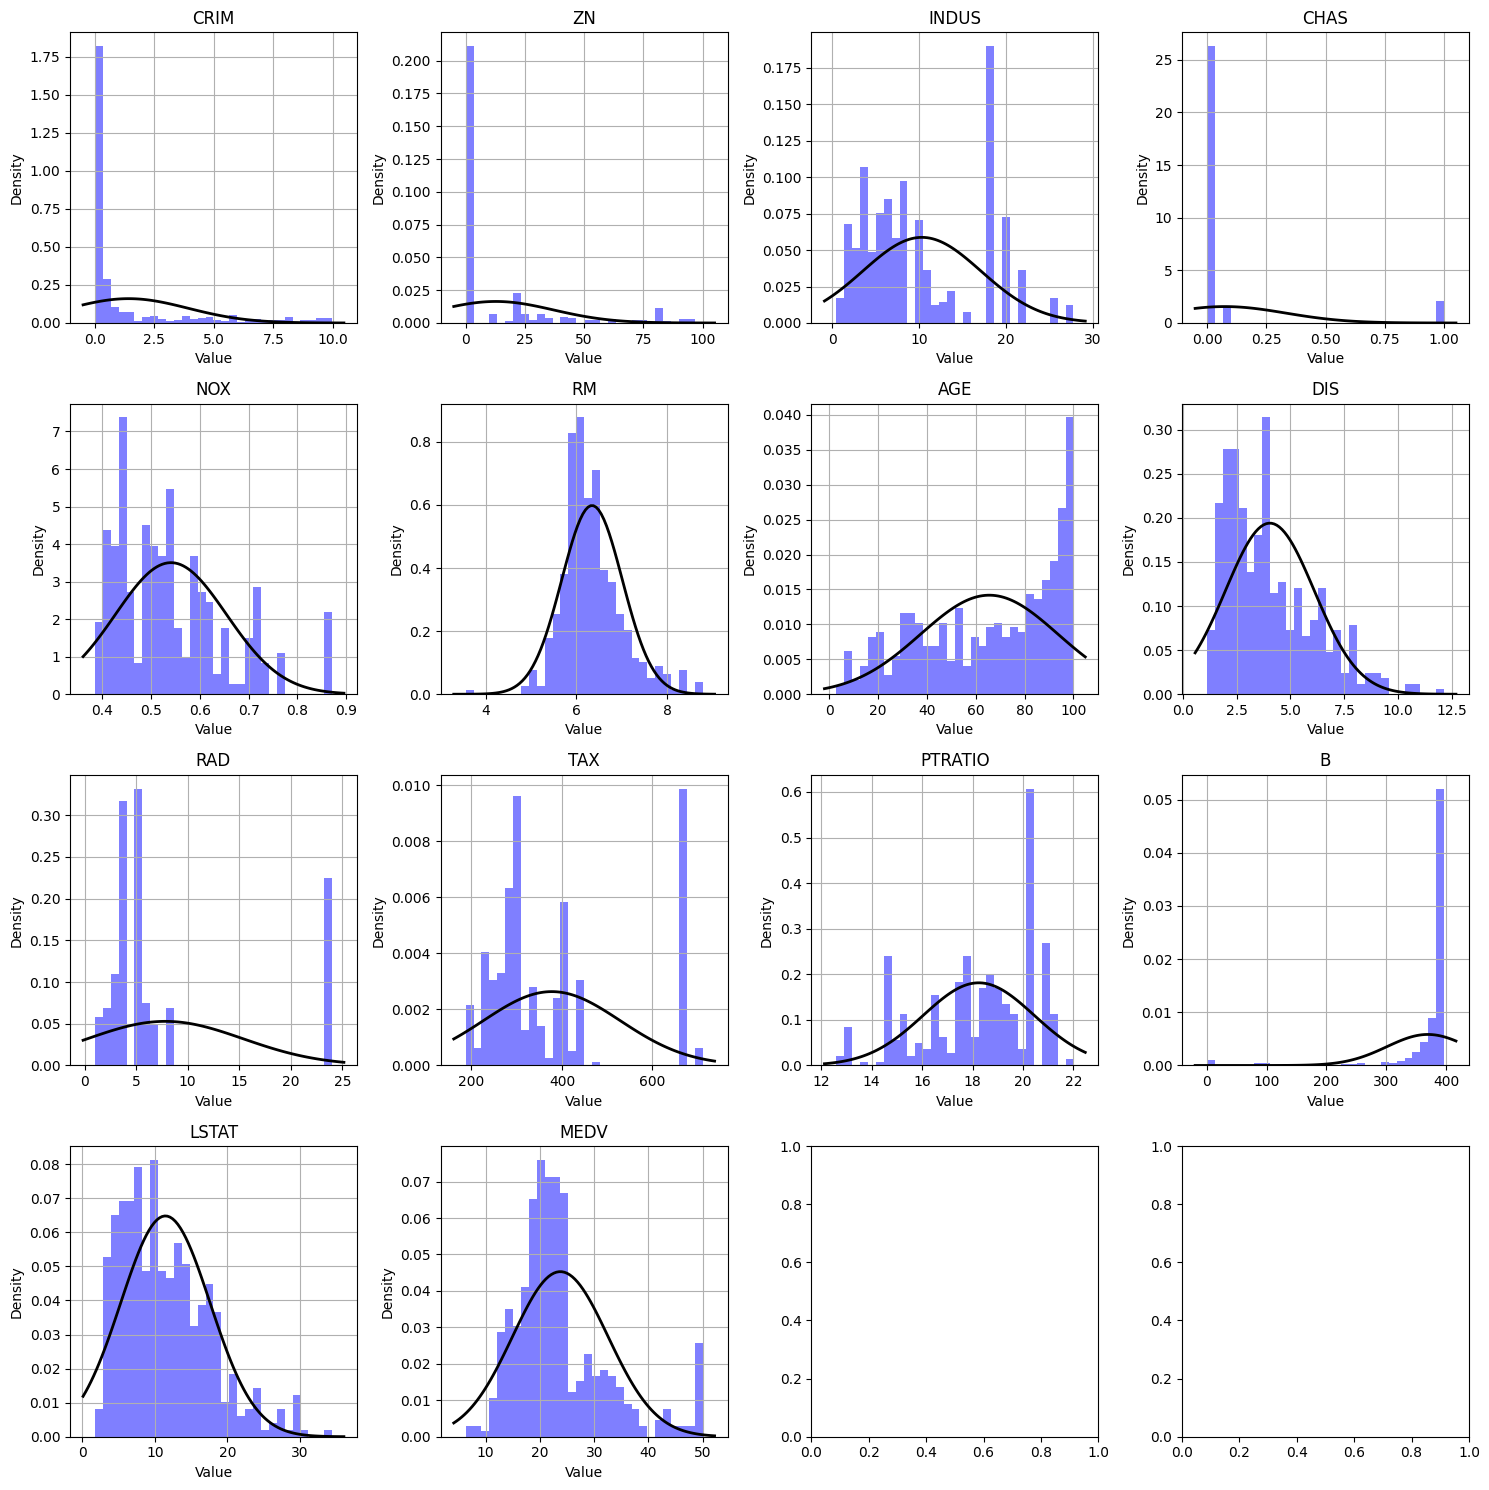

In [17]:
from scipy import stats
num_rows = 4
num_cols = 4

def comparing_distribution_of__features_by_normal_distribution(data_fream):
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
  axes = axes.flatten()
  for i, col in enumerate(data_fream.columns):
    ax = axes[i]
    ax.hist(data_fream[col], bins=30, density=True, alpha=0.5, color='blue')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data_fream[col].mean(), data_fream[col].std())
    ax.plot(x, p, 'k', linewidth=2)

  plt.tight_layout()
  plt.show()

comparing_distribution_of__features_by_normal_distribution(df_fill_by_mean)

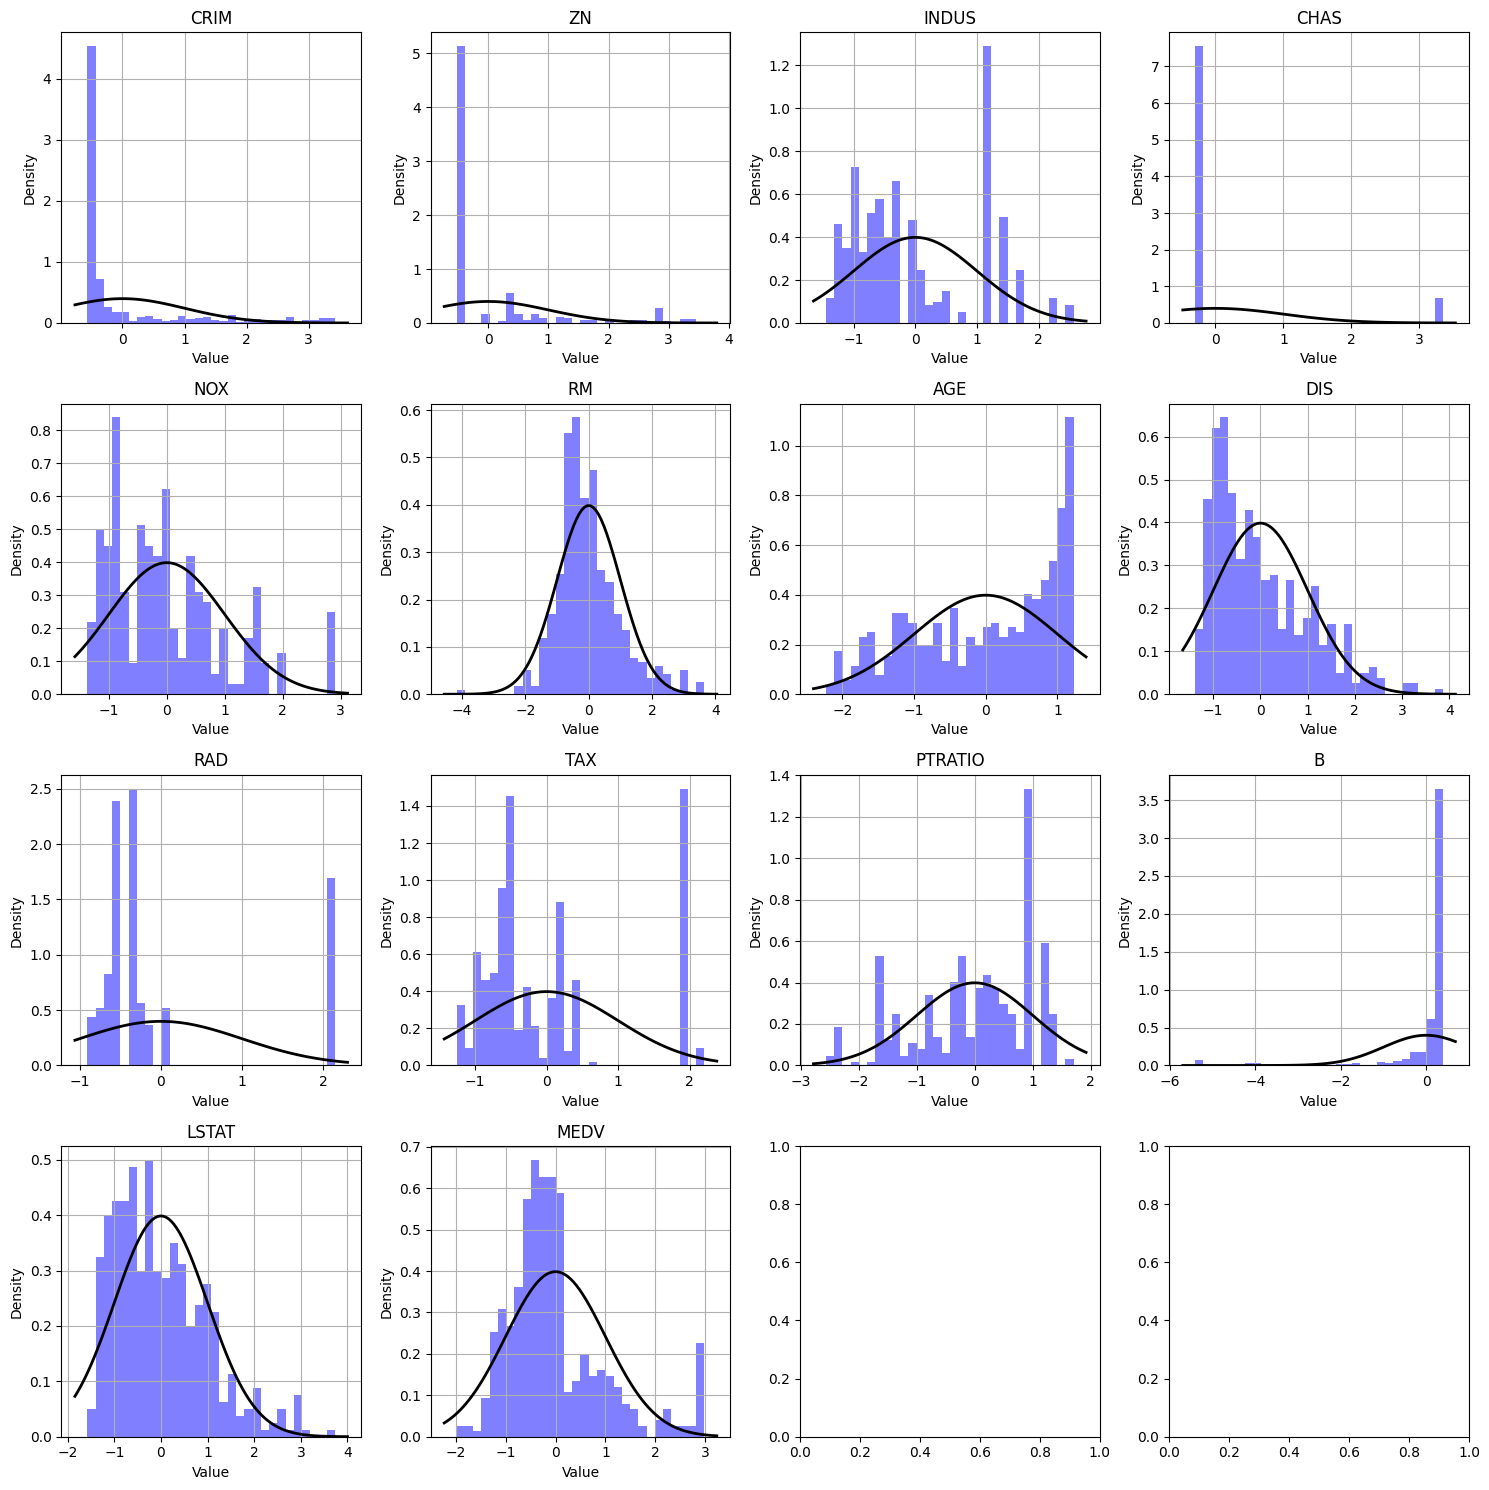

In [18]:
#Here I apply standardization on my features
from sklearn.preprocessing import StandardScaler

column_names = df_fill_by_rd_sp.columns
scaler = StandardScaler()
standardized_values = scaler.fit_transform(df_fill_by_rd_sp)
df_standardized = pd.DataFrame(standardized_values, columns=column_names)

df_second_phase = df_standardized
comparing_distribution_of__features_by_normal_distribution(df_standardized)

**Question 11**

 Before using categorical data in computational models, it is necessary to preprocess them into numerical values. This process is known as encoding.
 It means we use can several different types of techniques to convert categorical variables into a machine learning model acceptable form. In general, we use one hot encoding for nominal variables and ordinal encoding for ordinal variables.Some methods for this are:

 *  Ordinary Encoding
 *  One Hot Encoding
 *  Frequency_Encoding
 *  Mean Encoding

 Selecting an appropriate encoder and using it to encode the variables such that it does not lead to loss of information, but at same time also does not lead to overfitting or bad model performance is one of the key parts of feature engineering.

**Question 12**

*  **Training Dataset**: The sample of data used to fit the model.In other words, the actual dataset that we use to train the model (weights and biases in the case of a Neural Network). The model sees and learns from this data.

*  **Validation Dataset**: The validation set is used to evaluate a given model, but this is for frequent evaluation. We, as machine learning engineers, use this data to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it “Learn” from this. We use the validation set results, and update higher level hyperparameters. So the validation set affects a model, but only indirectly. The validation set is also known as the Dev set or the Development set. This makes sense since this dataset helps during the “development” stage of the model.

*  **Test Dataset**:  The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

**How to split our dataset into train, validation and test?**
This mainly depends on 2 things. First, the total number of samples in your data and second, on the actual model you are training.Here is some method for doing that:

*  Random Sampling
*  Stratified Dataset Splitting
*  Cross-Validation Splitting

In [19]:
#here I use random sampling
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df_standardized, test_size=TEST_SIZE, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=(2 * TEST_SIZE) - 0.1 , random_state=42)

**Question 15**

In supervised learning we have a dataset by labels, and we have some lists of outcomes and what types of outcomes we have, give us either regression or classification problems.

When we have a regression problem, typically our outcome values are real numbers.In the other words, our model recieve features and return an integer or a float.

Whern we have a classification problem, typically our outcomes are classes or categories.

**Question 16**

<p dir=rtl>
روش ارائه شده درباره رگرسیون خطی که RSS نام دارد اینگونه کار می کند که فرض می کند تخمین گر خطی ما بصورت y' = ax + b است، منطقی است هر چه خطای پیش بینی ما کمتر باشد، مدل دقیق تر پیش بینی می کند و در این روش، خطا از جمع مربعات اختلاف y واقعی از y' برای تک تک نقاط محاسبه می شود. و درواقع اگر این تابع مینیمم شود، ما به سمت هدفمان حرکت کرده ایم.اکنون برای یافتن a و b که کمترین خطا را ایجاد کنند، از تابع نامبرده یکبار نسبت به a مشتق میگیریم و برایر 0 میگذاریم و یکبار نسبت به b تا در نهایت بهترین a و b پیدا شوند.
</p>

In [20]:
#FIRST
def linear_regression(input, output):
  mean_x = np.mean(input)
  mean_y = np.mean(output)

  x_diff = input - mean_x
  y_diff = output - mean_x
  x_diff_sqr = ((input - mean_x) ** 2)

  slope_num = (x_diff * y_diff).sum()
  slope_den = x_diff_sqr.sum()
  slope = slope_num / slope_den

  bias = mean_y - (slope * mean_x)

  return bias, slope

In [21]:
#here is a code to visualize points and linier regression
def points_and_regression_plotter(x, y, bias, slope, y_name, x_name):
  plt.scatter(x, y, color='orange', label='Data Points')

  x_values = np.linspace(min(x), max(x), 100)
  y_values = slope * x_values + bias
  plt.plot(x_values, y_values, color='red', label='Linear Regression')

  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title('Data Points with Linear Regression Line')
  plt.legend()

  plt.show()

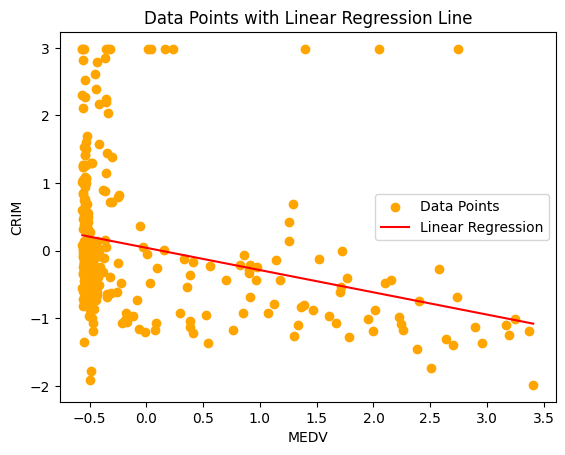

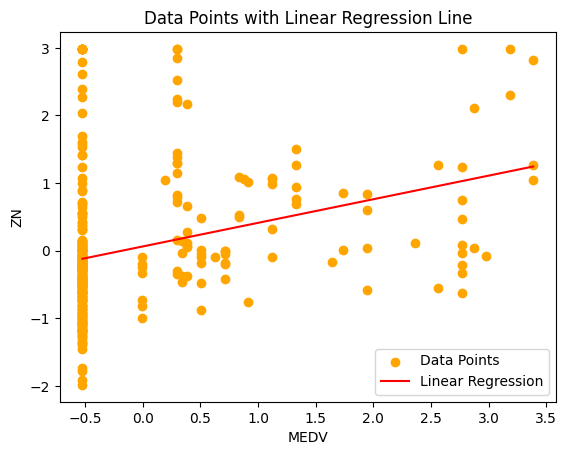

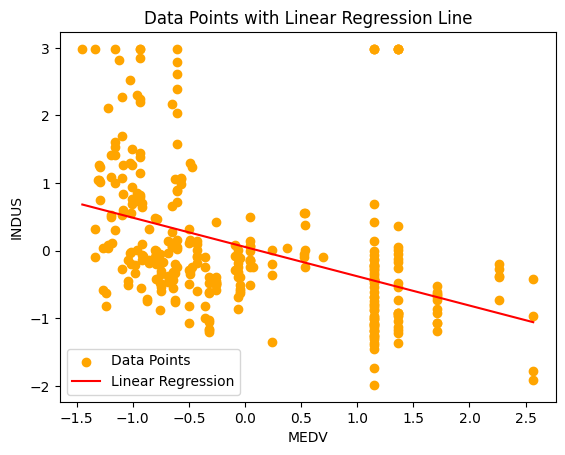

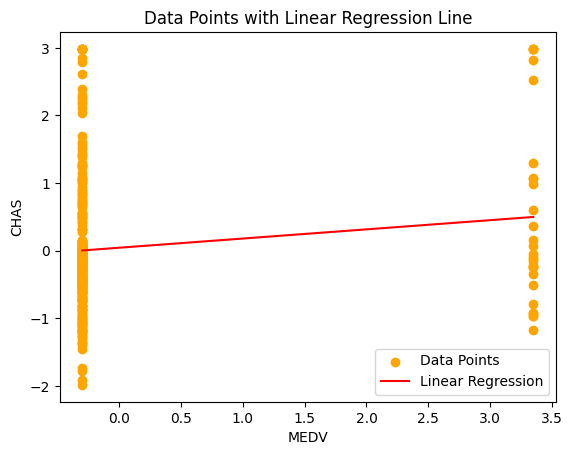

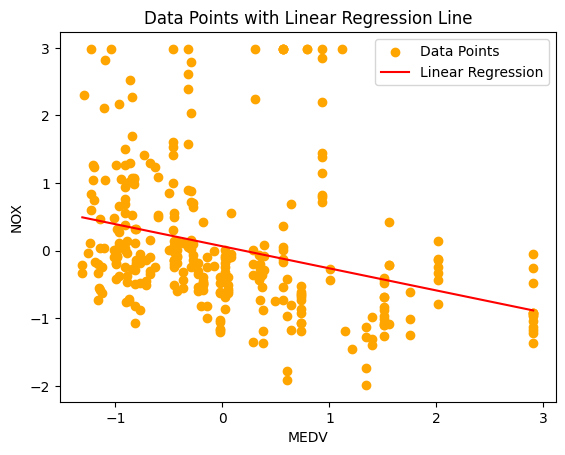

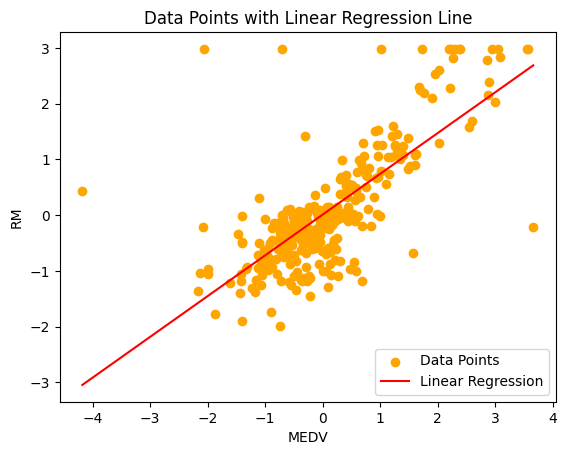

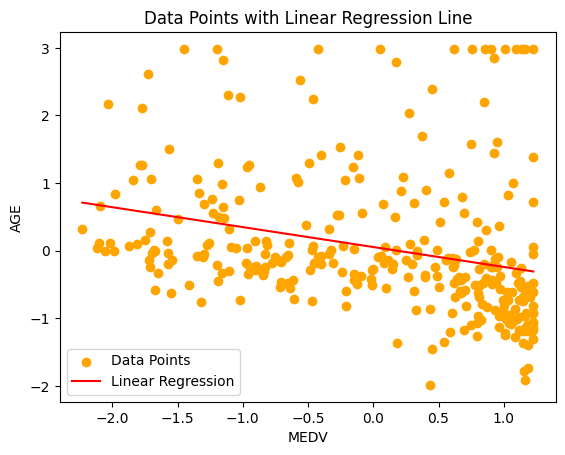

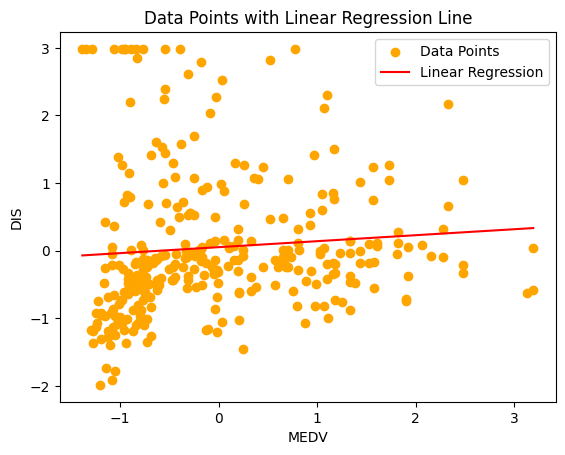

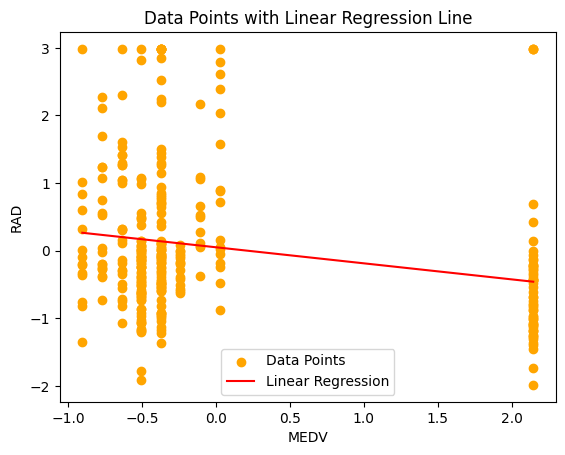

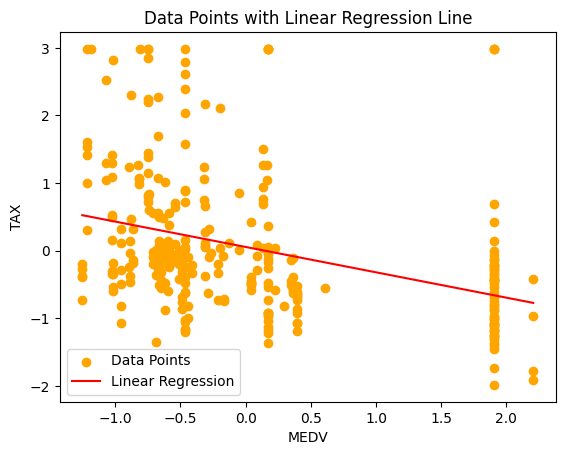

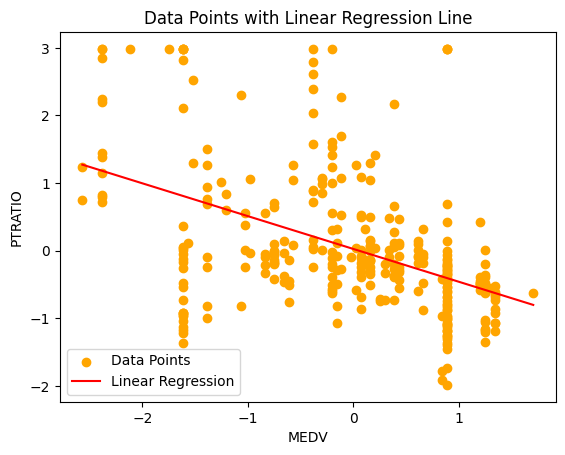

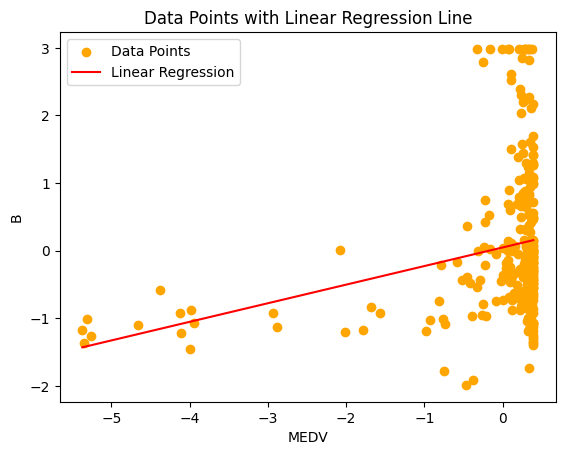

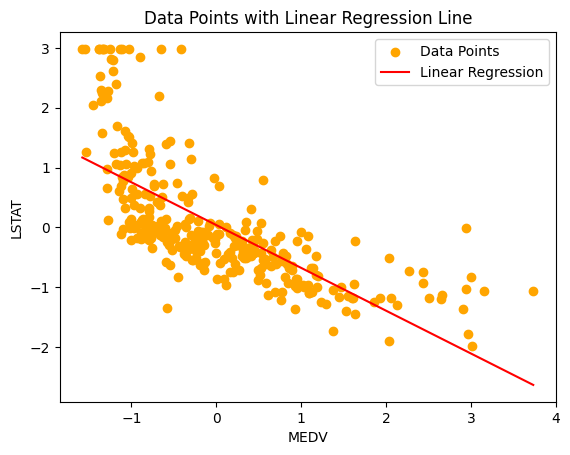

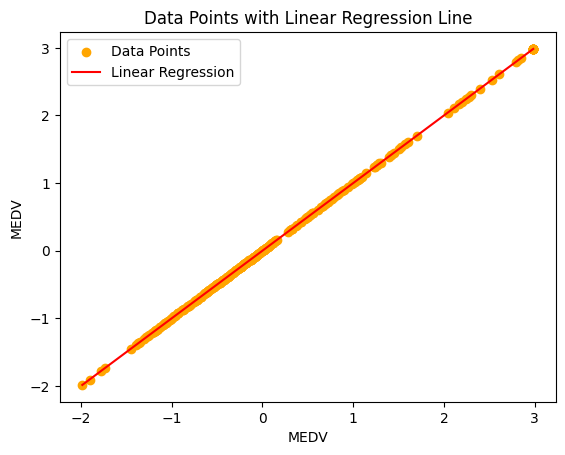

In [23]:
designated_feature_list = []
for column in df_train.columns:
  designated_feature_list.append(column)

variable_slope_bias = []
for feature in designated_feature_list:
  bias, slope = linear_regression(df_train[feature].values, df_train[target_item].values)
  points_and_regression_plotter(df_train[feature].values, df_train[target_item].values, bias, slope, str(feature), str(target_item))
  variable_slope_bias.append({'var' : feature, 'slope' : slope, 'bias' : bias})

**Question 18**

*  **RSS**: The sum of squares is used as a mathematical way to find the function that best fits (varies least) from the data.

  The RSS measures the amount of error remaining between the regression function and the data set after the model has been run. A smaller RSS figure represents a regression function that is well-fit to the data.

  The RSS, also known as the sum of squared residuals, essentially determines how well a regression model explains or represents the data in the model.

  RSS = ∑i (yi - f(xi))2

*  **MSE**: Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases. The mean squared error is also known as the mean squared deviation (MSD).

  MSE = ∑i (yi - f(xi))2 / n

  The MSE is the average squared distance between the observed and predicted values. Because it uses squared units rather than the natural data units, the interpretation is less intuitive

  Additionally, squaring increases the impact of larger errors. These calculations disproportionately penalize larger errors more than smaller errors. This property is essential when you want your model to have smaller errors.

*  **RMSE**: The root mean square error (RMSE) measures the average difference between a statistical model’s predicted values and the actual values. Mathematically, it is the standard deviation of the residuals. Residuals represent the distance between the regression line and the data points.

  RMSE quantifies how dispersed these residuals are, revealing how tightly the observed data clusters around the predicted values.

  Use the root mean square error to assess the amount of error in a regression or other statistical model. A value of 0 means that the predicted values perfectly match the actual values, but you’ll never see that in practice. Low RMSE values indicate that the model fits the data well and has more precise predictions. Conversely, higher values suggest more error and less precise predictions.

  RMSE = sqrt(MSE)

*  **R2 score**: R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale
  R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression

  A score closer to 1 indicates that a larger proportion of the variability in the target variable is explained by the independent variables, implying a better fit of the model to the data. A score closer to 0 suggests that the model does not explain much of the variability in the target variable, indicating a poor fit.

 TSS=∑i=1n​(yi​−yˉ​)2

 RSS=∑i=1n​(yi​−y^​i​)2

  R2=1 − (RSS/TSS)

**Question 19, 20**
<p dir=rtl>
با توجه به قسمت قبلی در بررسی عملکرد یک مدل رگرسیون خطی، هرچه RMSE به صفر نزدیک تر باشد و R2 به یک نزدیکتر باشد، دقت مدل در پیش بینی بالاتر است،  اعداد محاسبه  شده و چاپ شده در این قسمت نشان می دهند که بعد از خود ویژگی هدف، ویژگی LSTAT بهترین ویژگی است که میتوانیم با استفاده از آن ، یک رگرسیون خطی برای متغیر هدف ایجاد کنیم هرچند که در نمودار بخش قبل نیز واضح است.
</p>

In [24]:
def true_and_predicted_plot(true_labels, predicted_labels):
  plt.scatter(true_labels, predicted_labels, color='blue', label='Predicted vs True')
  plt.plot(true_labels, true_labels, color='red', linestyle='--', label='Perfect prediction (y=x)')

  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.legend()

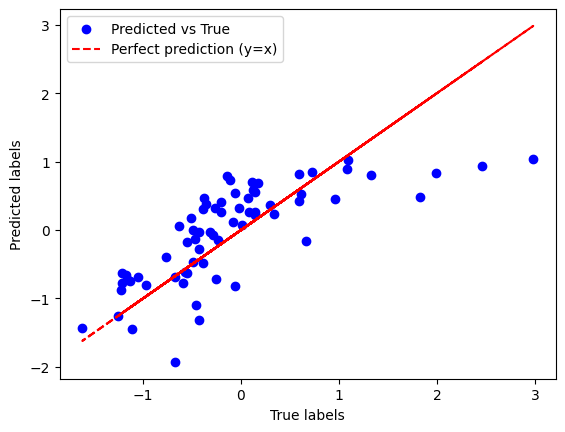

In [25]:
#here test linier regression for testing data using RMSE and R2 score
from sklearn.metrics import mean_squared_error, r2_score
#SECOND
def get_regression_predictions(input, intercept, slope):
  predict = (slope * input) + intercept
  return predict

def get_root_mean_square_error(predicted_values, actual_values):
  squared_errors = (actual_values - predicted_values) ** 2
  MSE = np.mean(squared_errors)
  RMSE = np.sqrt(MSE)
  return RMSE

def get_r2_score(predicted_values, actual_values):
  mean_of_actual = np.mean(actual_values)
  TSS = np.sum((actual_values - mean_of_actual) ** 2)
  RSS = np.sum((actual_values - predicted_values) ** 2)
  R2_score = 1 - (RSS / TSS)
  return R2_score

var_RMSE_R2score = []
true_values = df_test[target_item].to_numpy()
for item in variable_slope_bias:
  temp_test = df_test[item['var']].to_numpy()
  slope = item['slope']
  bias = item['bias']
  predicted_values = get_regression_predictions(temp_test, bias, slope)
  if item['var'] == 'LSTAT':
    true_and_predicted_plot(true_values, predicted_values)
  rmse = get_root_mean_square_error(predicted_values, true_values)
  r2 = get_r2_score(predicted_values, true_values)
  var_RMSE_R2score.append({'var' : item['var'], 'rmse' : rmse, 'r2' : r2})

In [26]:
#print results
headers = var_RMSE_R2score[0].keys()
rows = [d.values() for d in var_RMSE_R2score]

print(tabulate(rows, headers=headers, tablefmt='grid'))

+---------+----------+------------+
| var     |     rmse |         r2 |
+=========+==========+============+
| CRIM    | 0.798005 |  0.148496  |
+---------+----------+------------+
| ZN      | 0.774494 |  0.197931  |
+---------+----------+------------+
| INDUS   | 0.760885 |  0.225871  |
+---------+----------+------------+
| CHAS    | 0.893807 | -0.0682248 |
+---------+----------+------------+
| NOX     | 0.805671 |  0.132058  |
+---------+----------+------------+
| RM      | 0.573586 |  0.560081  |
+---------+----------+------------+
| AGE     | 0.799885 |  0.144479  |
+---------+----------+------------+
| DIS     | 0.850678 |  0.032377  |
+---------+----------+------------+
| RAD     | 0.828247 |  0.0827337 |
+---------+----------+------------+
| TAX     | 0.769899 |  0.20742   |
+---------+----------+------------+
| PTRATIO | 0.76319  |  0.221172  |
+---------+----------+------------+
| B       | 0.831197 |  0.0761873 |
+---------+----------+------------+
| LSTAT   | 0.590086 |  0.53

**Question 21**
In machine learning and data mining, pruning is a technique associated with decision trees. Pruning is a technique that removes the parts of the Decision Tree which prevent it from growing to its full depth. The parts that it removes from the tree are the parts that do not provide the power to classify instances. A Decision tree that is trained to its full depth will highly likely lead to overfitting the training data - therefore Pruning is important.

* Some Advantages:

  **Improved Generalization:** Pruning helps prevent overfitting, which occurs when the tree captures noise or patterns specific to the training data but not generalizable to unseen data. By removing unnecessary branches, the pruned tree is more likely to generalize well to new data.

  **Reduced Complexity:** Pruning simplifies the structure of the decision tree by removing unimportant or redundant nodes. This results in a smaller and more interpretable tree, which is easier to understand and explain to stakeholders.

  **Faster Prediction:** Smaller decision trees resulting from pruning often require less computational resources to make predictions. This can be advantageous in real-time or resource-constrained applications where prediction speed is important.

*  Some Disadvantages:

  **Loss of Information:** Pruning may lead to a loss of information contained in the removed branches of the tree. If some of these branches contain important patterns or relationships in the data, pruning could decrease the predictive accuracy of the model.

  **Over-Pruning:** If pruning is too aggressive, it can remove branches that are actually important for accurate prediction. This can result in underfitting, where the model is too simplistic and fails to capture important patterns in the data.

  **Dependence on Hyperparameters:** The effectiveness of pruning techniques often depends on hyperparameters such as the pruning threshold or the size of the validation set used for post-pruning. Selecting appropriate hyperparameters requires experimentation and can be time-consuming.

  **Complexity of Implementation:** Implementing pruning algorithms, especially post-pruning techniques, can be more complex compared to building a decision tree without pruning. It requires additional steps such as validation set creation and recursive tree traversal for node removal.


**Question 22**
Decision trees may be preferred over other models like linear regression, support vector machines, or neural networks in situations where interpretability, feature importance, non-linearity, robustness to noise, mixed data types, or scalability are important considerations. However, it's essential to assess the specific characteristics of the dataset and the requirements of the task before deciding on the appropriate model.That mean decision trees have unique characteristics and advantages that they make us inclined to prefer decision trees to other methods. some of them are here:


1.   Interpretability
2.   Feature Importance
3.   Handling Non-linearity anInteractions
4.  Robustness to Irrelevant Features
5.  Mixed Data Types(numerical or categorical)
6.  Scalability




**Question 23**

KNN is a lazy learner, meaning it doesn't learn a discriminative function from the training data during the training phase. Instead, it memorizes the entire training dataset.


During prediction, KNN identifies the k nearest data points in the training dataset to the input data point based on a distance metric (e.g., Euclidean distance). The class label of the majority of these k neighbors is then assigned to the input data point.

According to these, KNN doesn't have a traditional training phase but can be slow during prediction, especially for large datasets, as it needs to compute distances to all training points. In contrast, logistic regression and neural networks require a training phase, but prediction time can be faster once trained.
Generalization: KNN may suffer from the curse of dimensionality, especially when dealing with high-dimensional data, as distance-based metrics become less meaningful. Logistic regression and neural networks can learn complex, non-linear decision boundaries and may generalize better to high-dimensional data.

 the natural differences between KNN and other classification methods like logistic regression and neural networks lie in their training approach, memory usage, prediction time, and generalization capabilities.



**Question 24**

It is a special case of the K-Nearest Neighbors (KNN) algorithm with K set to 1, meaning it only considers the single nearest neighbor to a given data point for making predictions.

**Training phase:**In the training phase, the algorithm simply memorizes the entire training dataset without any explicit model building.
**Prediction phase:**When a new data point is presented for prediction, the algorithm calculates the distance between the new data point and each data point in the training set. Common distance metrics include Euclidean distance, Manhattan distance, or Minkowski distance. The nearest neighbor to the new data point is identified based on the smallest distance.

 **Prediction**For classification tasks, the predicted class label for the new data point is the same as the class label of its nearest neighbor in the training set. For regression tasks, the predicted target value is the same as the target value of the nearest neighbor.

**Some Advantages:**



*   Simplicity
*   Non-parametric
*  Adaptability to Data
*  No Training Time


**Some Disadvantages:**

*  Computationally Intensive
*  Memory Usage
*  Sensitive to Noise and Outliers
*  Lack of Interpretability

**Question 25**

There are several distance measurment methods but Euclidean distance function is the most popular one among all of them.here are name of some other methods

*  Minkowski Distance
*  Manhattan Distance
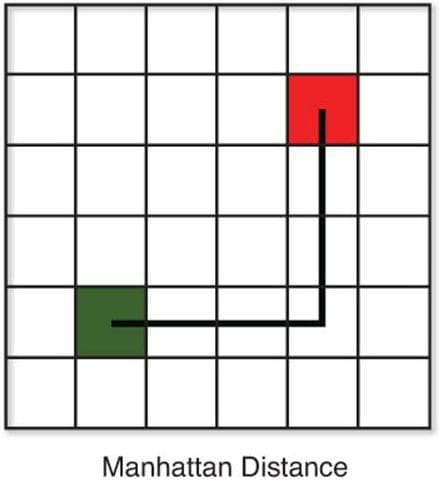

*  Euclidean Distance
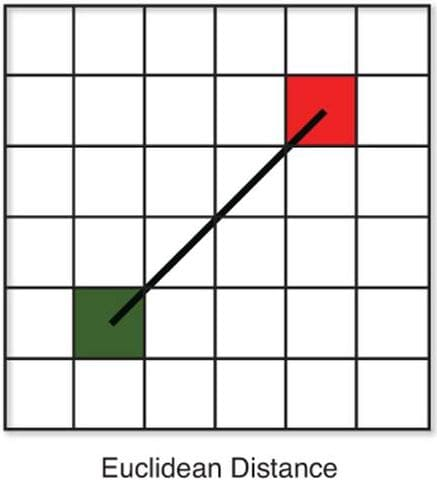

*  Cosine Distance
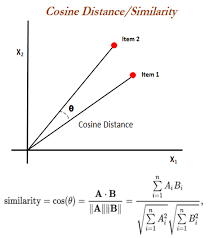

* Hamming Distance

**Quesstion 26**

In [27]:
#I considered 2 for lux, 1 for regular and 0 for economic homes
class_assignment = {'economic' : 0, 'regular' : 1, 'lux' : 2}
lux_rate = df_second_phase['MEDV'].quantile(0.8)
economy_rate = df_second_phase['MEDV'].quantile(0.2)
def assign_new_label(temp_row):
  if temp_row['MEDV'] >= lux_rate:
    return 2
  elif temp_row['MEDV'] <= economy_rate:
    return 1
  else:
    return 0

df_second_phase['HT'] = df_second_phase.apply(assign_new_label, axis=1)
df_second_phase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    float64
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
 14  HT       452 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 53.1 KB


In [28]:
#first I split my dataset into train, test and held_out
from sklearn.model_selection import train_test_split

df_train_second, df_temp_second = train_test_split(df_second_phase, test_size=TEST_SIZE, random_state=42)
df_eval_second, df_test_second = train_test_split(df_temp_second, test_size=TEST_SIZE, random_state=42)

In [29]:
#seperating features from label
df_train_features = df_train_second.drop(columns=['HT', target_item])
df_train_label = df_train_second['HT']

df_eval_features = df_eval_second.drop(columns=['HT', target_item])
df_eval_label = df_eval_second['HT']

df_test_features = df_test_second.drop(columns=['HT', target_item])
df_test_label = df_test_second['HT']

Here is aboout KNN model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 4
print('Number_of_neighbors = ', k)
#training
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(df_train_features, df_train_label)

#evaluation
eval_predicted_labels = KNN_model.predict(df_eval_features)
eval_accuracy = accuracy_score(df_eval_label, eval_predicted_labels)
print("Evaluation Accuracy:", eval_accuracy)

#testing
test_predicted_labels = KNN_model.predict(df_test_features)
test_accuracy = accuracy_score(df_test_label, test_predicted_labels)
print("Test Accuracy:", test_accuracy)

Number_of_neighbors =  4
Evaluation Accuracy: 0.7578947368421053
Test Accuracy: 0.8536585365853658


Here is about Desicion Tree model

In [31]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=20,
    max_features=None,
    random_state=10
)

#training
DT_model.fit(df_train_features, df_train_label)

#evaluation
eval_pred_labels_dt = DT_model.predict(df_eval_features)
eval_accuracy_dt = accuracy_score(df_eval_label, eval_pred_labels_dt)
print("Evaluation Accuracy:", eval_accuracy_dt)

#testing
test_pred_labels_dt = DT_model.predict(df_test_features)
test_accuracy_dt = accuracy_score(df_test_label, test_pred_labels_dt)
print("Test Accuracy:", test_accuracy_dt)

Evaluation Accuracy: 0.7894736842105263
Test Accuracy: 0.8292682926829268


**Question 27**
GridSearchCV is a powerful tool for hyperparameter tuning in machine learning and can be used to find the best set of hyperparameters for a given model and dataset. It works by training and evaluating the performance of a model for a grid of hyperparameter values, and choosing the best hyperparameters based on the performance metric. By using GridSearchCV, you can save a lot of time and effort in manually tuning the hyperparameters, as the tool will perform the tuning automatically. Additionally, it can also help prevent overfitting, as it will choose the hyperparameters that result in the best generalization performance on the test set.

In [32]:
from sklearn.model_selection import GridSearchCV
KNN_par_grid = { 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'weights': ['uniform', 'distance'],
                 'p': [1, 2, 3]}
DT_par_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None]}

KNN_model_tun = KNeighborsClassifier()
DT_model_tun = DecisionTreeClassifier()

KNN_grid_search = GridSearchCV(estimator=KNN_model_tun, param_grid=KNN_par_grid, cv=5, scoring='accuracy')
DT_grid_search = GridSearchCV(estimator=DT_model_tun, param_grid=DT_par_grid, cv=5, scoring='accuracy')

KNN_grid_search.fit(df_train_features, df_train_label)
DT_grid_search.fit(df_train_features, df_train_label)

best_KNN_par = KNN_grid_search.best_params_
best_KNN_accuracy = KNN_grid_search.best_score_

best_DT_par = DT_grid_search.best_params_
best_DT_accuracy = DT_grid_search.best_score_

print("Best Parameters for KNN:", best_KNN_par)
print("Best Score for KNN:", best_KNN_accuracy)
print("Best Parameters for Decision Tree:", best_DT_par)
print("Best Score for Decision Tree:", best_DT_accuracy)

best_KNN_model = KNN_grid_search.best_estimator_
best_KNN_test_pred = best_KNN_model.predict(df_test_features)
KNN_test_accuracy = accuracy_score(df_test_label, best_KNN_test_pred)
print("Test Accuracy for Best KNN Model:", KNN_test_accuracy)

best_DT_model = DT_grid_search.best_estimator_
best_DT_test_pred = best_DT_model.predict(df_test_features)
DT_test_accuracy = accuracy_score(df_test_label, best_DT_test_pred)
print("Test Accuracy for Best Decision Tree Model:", DT_test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score for KNN: 0.8765873015873016
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decision Tree: 0.8417162698412699
Test Accuracy for Best KNN Model: 0.8536585365853658
Test Accuracy for Best Decision Tree Model: 0.8536585365853658


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


**Question 28**

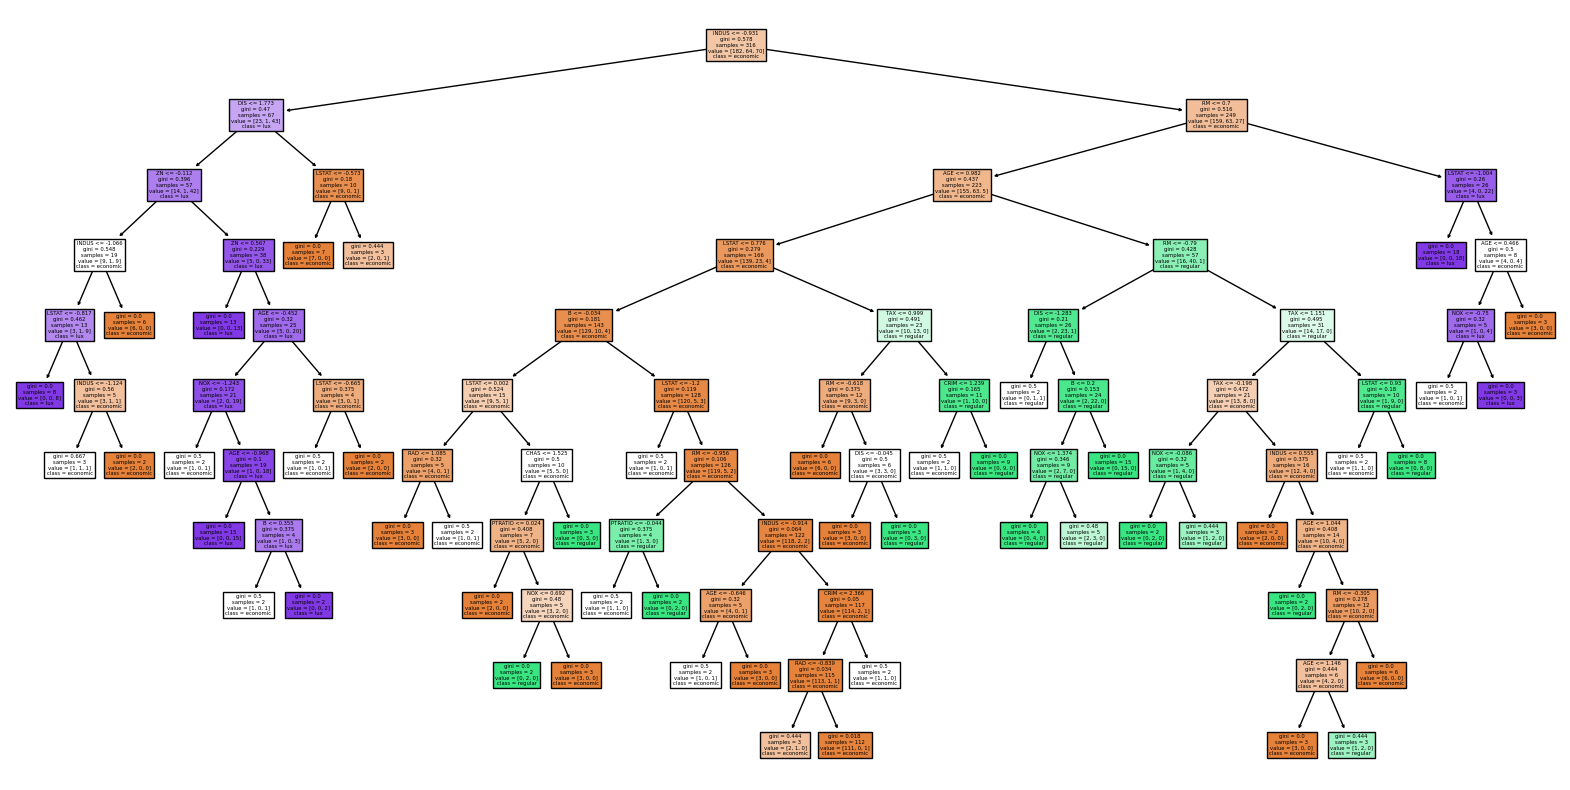

In [33]:
from sklearn.tree import plot_tree

class_mapping = {0: 'economic', 1: 'regular', 2: 'lux'}
plt.figure(figsize=(20,10))
plot_tree(best_DT_model, filled=True, feature_names=df_train_features.columns, class_names=[class_mapping[i] for i in best_DT_model.classes_])
plt.show()

**Question 30**
The goal of any machine learning problem is to find a single model that will best predict our wanted outcome. Rather than making one model and hoping this model is the best/most accurate predictor we can make, ensemble methods take a myriad of models into account, and average those models to produce one final model.

Here are some main resons that why ensemble methods highly regarded:

* **Improved Predictive Accuracy:** Ensemble methods combine the predictions of multiple base models to produce a more accurate and robust prediction compared to any individual model. By leveraging the diversity of multiple models, ensemble methods can capture different aspects of the data and reduce the risk of overfitting.

* **Reduction of Overfitting:** Ensemble methods help mitigate overfitting by aggregating the predictions of multiple weak learners (models that perform slightly better than random guessing). Each weak learner focuses on different aspects of the data, and their combination through ensembling reduces the risk of memorizing noise in the training data.

* **Robustness to Noise and Outliers:** Ensemble methods are inherently robust to noise and outliers in the data. Since they combine the predictions of multiple models, outliers or noisy data points are less likely to have a significant impact on the final prediction.

* **Versatility:** Ensemble methods can be applied to various types of machine learning tasks, including classification, regression, and ranking. They can also be used with different types of base learners, such as decision trees, linear models, and neural networks, making them versatile and applicable in a wide range of scenarios.




**Question 31**

**Boosting:**
  Boosting is an iterative ensemble method where base learners are trained sequentially. Each base learner focuses on correcting the errors made by its predecessors.

  In Boosting, each base learner is trained on a modified version of the dataset, where the weights of incorrectly classified instances are increased. As a result, subsequent base learners focus more on the instances that were misclassified by previous learners.
    
  **Key Characteristics:**

    * Sequential training of base learners.

    * Each base learner is weighted based on its performance.

    * Emphasis on instances that were misclassified by previous learners.
  **Advantages:**

    * Typically achieves higher accuracy compared to Bagging.

    * Can handle class imbalance well.

  **Disadvantages:**

    * Sensitive to noisy data and outliers.

    * Prone to overfitting if the number of iterations (learners) is too high.

  **Bagging (Bootstrap Aggregating)**:
  Bagging is a parallel ensemble method where base learners are trained independently in parallel.

  In Bagging, multiple subsets of the original dataset are created through bootstrapping (sampling with replacement). Each base learner is trained on one of these subsets independently of the others.

  **Key Characteristics:**
    * Parallel training of base learners.

    * Each base learner is trained on a different subset of the data.

    * Aggregation of predictions through averaging or voting.

  **Advantages:**

    * Reduces variance and overfitting by averaging predictions from multiple models.

    * Robust to noise and outliers.

  **Disadvantages:**

   * May not improve performance as much as Boosting, especially when dealing with high bias models.
    
   * Less effective for handling class imbalance compared to Boosting.


**Key Differences of these two methods:**

  * **Training Process:** Boosting trains base learners sequentially, with each learner focusing on correcting the errors made by its predecessors. Bagging trains base learners independently in parallel, with each learner trained on a different subset of the data.

  * **Weighting:** Boosting assigns weights to each base learner based on its performance, with more weight given to better-performing learners. Bagging does not assign weights to individual learners, and predictions are typically aggregated through averaging or voting.

  * **Handling of Misclassifications:** Boosting places more emphasis on instances that were misclassified by previous learners, while Bagging treats all instances equally.

  * **Sensitivity to Noisy Data:** Boosting is more sensitive to noisy data and outliers compared to Bagging due to its sequential nature.

**Question 32**

Random Forest is an ensemble learning method used for classification and regression tasks.

Random Forest creates multiple decision trees by training each tree on a different subset of the training data. It uses bootstrap sampling, which involves randomly sampling the training data with replacement to create these subsets.

During the construction of each decision tree in the forest, a random subset of features is considered for each split. This helps to decorrelate the trees and prevents individual trees from dominating the decision-making process.

For classification tasks, each tree in the forest predicts the class label of the input data point, and the final prediction is determined by majority voting among all the trees. For regression tasks, the final prediction is often the average of the predictions made by all the trees.

By combining the predictions of multiple decision trees trained on different subsets of the data and using random feature subsets, Random Forest reduces overfitting and improves the generalization performance compared to individual decision trees.

Random Forest can be trained in parallel, making it computationally efficient for large datasets.

**Question 33**

Bootstraping in Random Forests is a method of sampling used to create subsets of the data for training individual decision trees within the forest. Instead of using the entire dataset for training each tree, bootstraping involves randomly sampling data points from the original dataset with replacement to create multiple subsets of the data.

The main purpose of bootstraping in Random Forests is to introduce diversity among the decision trees. By training each tree on a different subset of the data, Random Forests can reduce overfitting and improve the generalization performance of the model.

how does it affect result?

Each decision tree in the Random Forest is trained on a different subset of the data, which leads to a diverse set of trees. This diversity helps the model capture different aspects of the underlying patterns in the data.

By aggregating predictions from multiple trees trained on different subsets of the data, Random Forests tend to have lower variance compared to individual decision trees. This can lead to more stable and reliable predictions.

Random Forests typically generalize well to unseen data because they are less prone to overfitting. The ensemble of trees produced by bootstraping can provide robust predictions for various types of datasets.



**Question 34**

The number of decision trees in a Random Forest is an important hyperparameter that can significantly impact the performance of the model. Generally, increasing the number of trees can lead to better performance up to a certain point, after which the improvement becomes marginal or even negligible.

Having too few trees in the forest might result in underfitting, where the model fails to capture complex patterns in the data. On the other hand, having too many trees can increase computational complexity and may lead to overfitting, where the model memorizes the training data and performs poorly on unseen data.

The optimal number of trees in a Random Forest depends on various factors, including the size and complexity of the dataset, the presence of noise or irrelevant features, and computational resources available. In practice, it is common to use a large number of trees (about hundreds or even thousands) and then tune this hyperparameter using techniques like cross-validation.

As for the best number of trees according to experience, there is no universal answer as it can vary depending on the specific dataset and problem at hand. However, empirical studies and practical experience suggest that using a moderate to large number of trees (about 100 to 1000) often yields good results across a wide range of datasets. But, it is recommended to experiment with different numbers of trees and evaluate the model's performance using validation techniques to determine the optimal value for each problem.

**Question 35**

*  **When not to use random forests?**

  *  If you require a highly interpretable model with easily understandable decision boundaries, Random Forests might not be the best choice. The ensemble nature of Random Forests can make it challenging to interpret individual trees' decisions, especially in large forests.

  * Random Forests can be memory-intensive and computationally expensive, especially when dealing with large datasets or a high number of trees. If you have limited computational resources or time constraints, other algorithms may be more suitable.

  * While Random Forests can handle class imbalance reasonably well, they may not be the best choice for highly imbalanced datasets where one class significantly outnumbers the others. In such cases, specialized techniques like resampling or cost-sensitive learning may be more effective.

* **When does it recommended?**

  * Random Forests can handle datasets with a large number of features (high dimensionality) effectively. They are robust to irrelevant features and can automatically select informative features, making them suitable for high-dimensional data.

  * Random Forests excel at capturing complex nonlinear relationships between features and the target variable. They can approximate highly nonlinear decision boundaries and are less prone to overfitting compared to individual decision trees.

  * If you want to improve the performance and robustness of your model by leveraging the wisdom of crowds, Random Forests are an excellent choice. Their ensemble approach combines multiple decision trees' predictions, resulting in better generalization performance and increased stability.

  * Random Forests typically require minimal hyperparameter tuning and are less sensitive to parameter settings compared to other algorithms like Support Vector Machines or Neural Networks. They often provide competitive performance with little effort in model tuning.

**Question 36**

The use of random forest method increases performance of the model and also decreases probability of overfitting, and since overfitting is inversely proportional to variance, this method reduces variance.

**Question 37**

**A brief description of each hyperparameter of random forest:**



*   **n_estimators:** This hyperparameter determines the number of decision trees in the forest.
*   **max_depth:** This parameter controls the maximum depth of each decision tree in the forest.
*   **min_samples_split:** It specifies the minimum number of samples required to split an internal node.
*   **min_samples_leaf:** This parameter determines the minimum number of samples required to be at a leaf node.
*   **max_features:** This hyperparameter specifies the maximum number of features to consider when looking for the best split at each node.
*   **bootstrap:** This parameter indicates whether bootstrap samples should be used when building trees.
*   **random_state:** This parameter sets the random seed for reproducibility of results. It ensures that the same random splits are generated each time the model is trained.





In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest_model = RandomForestClassifier()
par_grid_rf = {'n_estimators': [100, 250],
              'max_depth': [None, 2, 5],
              'min_samples_split': [1, 2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto']}
grid_search_cv = GridSearchCV(estimator=random_forest_model, param_grid=par_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)


grid_search_cv.fit(df_train_features, df_train_label)
best_par_rf = grid_search_cv.best_params_
best_score_rf = grid_search_cv.best_score_

best_random_forest_model = RandomForestClassifier(**best_par_rf)
best_random_forest_model.fit(df_train_features, df_train_label)
print('Best Parameters:', best_par_rf)

test_pred_label_rf = best_random_forest_model.predict(df_test_features)
test_accuracy_rf = accuracy_score(df_test_label, test_pred_label_rf)
print("Test set accuracy:", test_accuracy_rf)
print(classification_report(df_test_label, test_pred_label_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250}
Test set accuracy: 0.9024390243902439
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.78      1.00      0.88         7
           2       0.86      0.86      0.86         7

    accuracy                           0.90        41
   macro avg       0.86      0.92      0.89        41
weighted avg       0.91      0.90      0.90        41



**Question 40**

In [50]:
#part 1
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM_model_rbf_ker = SVC(kernel='rbf')
SVM_model_rbf_ker.fit(df_train_features, df_train_label)

SVM_model_linear_ker = SVC(kernel='linear')
SVM_model_linear_ker.fit(df_train_features, df_train_label)

pred_label_rbf_svm = SVM_model_rbf_ker.predict(df_test_features)
pred_label_linear_svm = SVM_model_linear_ker.predict(df_test_features)

print('Classification Report for kernel=rbf')
print(classification_report(df_test_label, pred_label_rbf_svm))
print('Classificarion Report for kernel=linear')
print(classification_report(df_test_label, pred_label_linear_svm))

Classification Report for kernel=rbf
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.75      0.86      0.80         7
           2       0.75      0.43      0.55         7

    accuracy                           0.80        41
   macro avg       0.78      0.72      0.73        41
weighted avg       0.80      0.80      0.79        41

Classificarion Report for kernel=linear
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.67      0.86      0.75         7
           2       0.80      0.57      0.67         7

    accuracy                           0.80        41
   macro avg       0.77      0.76      0.76        41
weighted avg       0.81      0.80      0.80        41



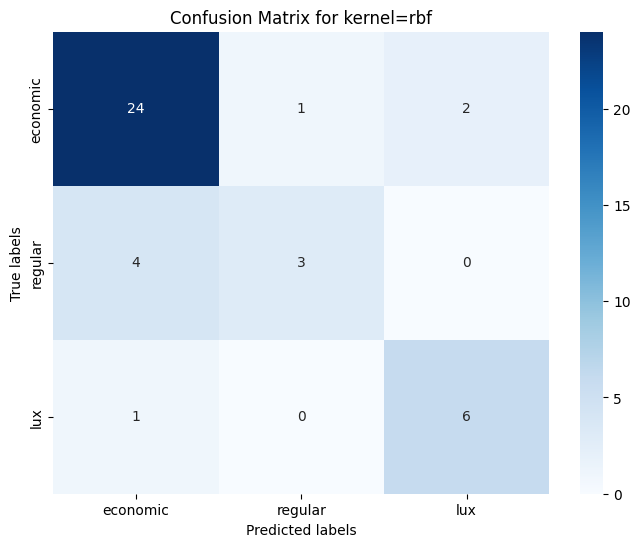

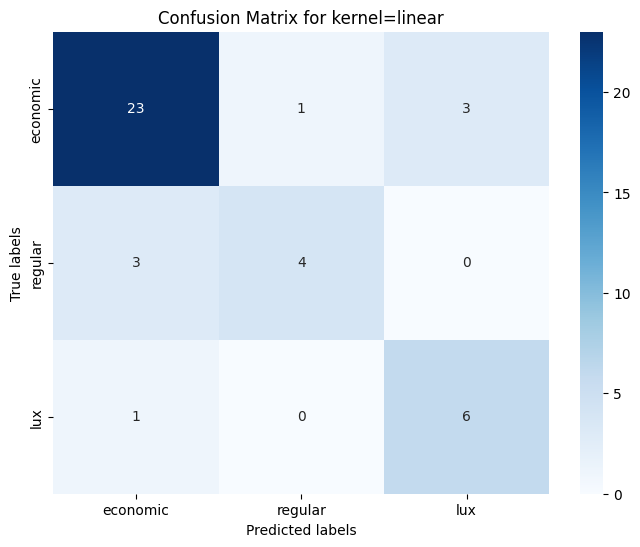

In [51]:
#show confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def confussion_matrix_plotter(confussion_matrix, class_names, plot_name):
  title = 'Confusion Matrix for '+ plot_name
  plt.figure(figsize=(8, 6))
  sns.heatmap(confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(title)
  plt.show()

class_names = list(class_assignment.keys())
labels = list(class_assignment.values())

label_pred_rbf_names = [class_names[label] for label in pred_label_rbf_svm]
label_pred_linear_names = [class_names[label] for label in pred_label_linear_svm]
df_test_label_name = [class_names[label] for label in df_test_label]

confusion_matrix_rbf = confusion_matrix(df_test_label_name, label_pred_rbf_names)
confusion_matrix_linear = confusion_matrix(df_test_label_name, label_pred_linear_names)

confussion_matrix_plotter(confusion_matrix_rbf, class_names, 'kernel=rbf')
confussion_matrix_plotter(confusion_matrix_linear, class_names, 'kernel=linear')

**#part 2**

random search or grid search here?

<p dir=rtl>
تفاوت های اساسی که بین این دو روش وجود دارد این است که در روش grid_search بار محاسباتی و زمانی نسبت به random search بیشتر است مخصوصا اینکه در اینجا ابعاد ویژگی ها زیاد است و تعداد نمونه ها نیز زیاد است.پس در این قسمت استفاده از random search بهتر است.البتهاین روش برخلاف روش دیگر تضمین نمی کند که دقیقا بهترین جواب را پیدا می کند بلکه جواب قابل قبولی را می یابد ولی بنطر در کنار بار محاسباتی گزینه مناسبی است.
</p>

**#part 3**

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

In [53]:
#random_search
par_random_rbf = { 'C': uniform(loc=0, scale=10),
                        'kernel': ['rbf'],
                        'gamma': ['scale', 'auto'],
                        'degree': [2, 3, 4]}
par_random_linear = { 'C': uniform(loc=0, scale=10),
                        'kernel': ['linear'],
                        'gamma': ['scale', 'auto'],
                        'degree': [2, 3, 4]}
svc_random_rbf = SVC()
svc_random_linear = SVC()

random_rbf = RandomizedSearchCV(estimator=svc_random_rbf, param_distributions=par_random_rbf, n_iter=100, cv=5, random_state=42)
random_linear = RandomizedSearchCV(estimator=svc_random_linear, param_distributions=par_random_linear, n_iter=100, cv=5, random_state=42)

random_rbf.fit(df_train_features, df_train_label)
random_linear.fit(df_train_features, df_train_label)

best_par_random_rbf = random_rbf.best_params_
best_par_random_linear = random_linear.best_params_

print('Best Parameters of random_rbf', best_par_random_rbf)
print('Best Parameters of random_linear', best_par_random_linear)

best_model_random_rbf = random_rbf.best_estimator_
best_model_random_linear = random_linear.best_estimator_

accuracy_random_rbf = best_model_random_rbf.score(df_test_features, df_test_label)
accuracy_random_linear = best_model_random_linear.score(df_test_features, df_test_label)

print("Accuracy of random_rbf:", accuracy_random_rbf)
print("Accuracy of random_linear:", accuracy_random_linear)

Best Parameters of random_rbf {'C': 4.5049925196954295, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
Best Parameters of random_linear {'C': 0.16587828927856152, 'degree': 4, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of random_rbf: 0.8536585365853658
Accuracy of random_linear: 0.8048780487804879


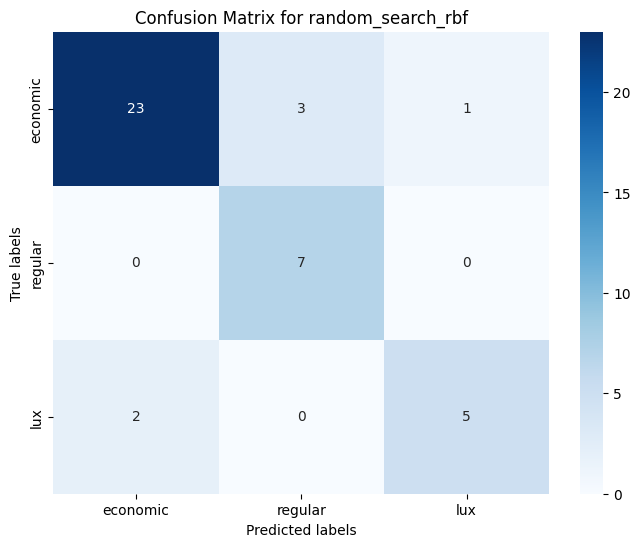

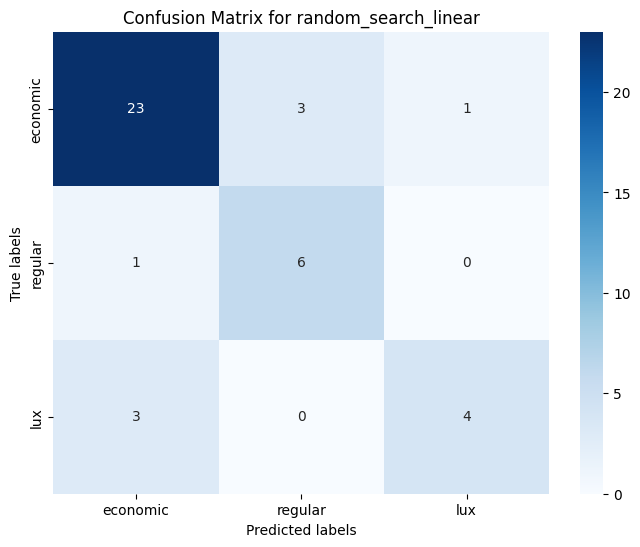

In [54]:
confusion_matrix_random_rbf = confusion_matrix(df_test_label, best_model_random_rbf.predict(df_test_features))
confussion_matrix_plotter(confusion_matrix_random_rbf, class_names, 'random_search_rbf')

confusion_matrix_random_linear = confusion_matrix(df_test_label, best_model_random_linear.predict(df_test_features))
confussion_matrix_plotter(confusion_matrix_random_linear, class_names, 'random_search_linear')

In [55]:
print(classification_report(df_test_label, best_model_random_rbf.predict(df_test_features)))
print(classification_report(df_test_label, best_model_random_linear.predict(df_test_features)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.70      1.00      0.82         7
           2       0.83      0.71      0.77         7

    accuracy                           0.85        41
   macro avg       0.82      0.86      0.83        41
weighted avg       0.87      0.85      0.85        41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.67      0.86      0.75         7
           2       0.80      0.57      0.67         7

    accuracy                           0.80        41
   macro avg       0.77      0.76      0.76        41
weighted avg       0.81      0.80      0.80        41



In [56]:
#grid search

par_grid_rbf = {'C': [0.1, 1, 5, 10, 100],
                'kernel': ['rbf'],
                'gamma': ['scale', 'auto'],
                'degree': [2, 3, 4]}
par_grid_linear = {'C': [0.1, 0.5, 1, 5, 10, 100],
                'kernel': ['linear'],
                'gamma': ['scale', 'auto'],
                'degree': [2, 3, 4]}

svc_grid_rbf = SVC()
svc_grid_linear = SVC()

grid_search_rbf = GridSearchCV(estimator=svc_grid_rbf, param_grid=par_grid_rbf, cv=5)
grid_search_linear = GridSearchCV(estimator=svc_grid_linear, param_grid=par_grid_linear, cv=5)

grid_search_rbf.fit(df_train_features, df_train_label)
grid_search_linear.fit(df_train_features, df_train_label)

best_par_grid_rbf = grid_search_rbf.best_params_
best_par_grid_linear = grid_search_linear.best_params_

print('Best Parameters of grid_rbf', best_par_grid_rbf)
print('Best Parameters of grid_linear', best_par_grid_linear)

best_model_grid_rbf = grid_search_rbf.best_estimator_
best_model_grid_linear = grid_search_linear.best_estimator_

accuracy_grid_rbf = best_model_grid_rbf.score(df_test_features, df_test_label)
accuracy_grid_linear = best_model_grid_linear.score(df_test_features, df_test_label)

print("Accuracy of grid_rbf:", accuracy_grid_rbf)
print("Accuracy of grid_linear:", accuracy_grid_linear)

Best Parameters of grid_rbf {'C': 5, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Parameters of grid_linear {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of grid_rbf: 0.8536585365853658
Accuracy of grid_linear: 0.7804878048780488


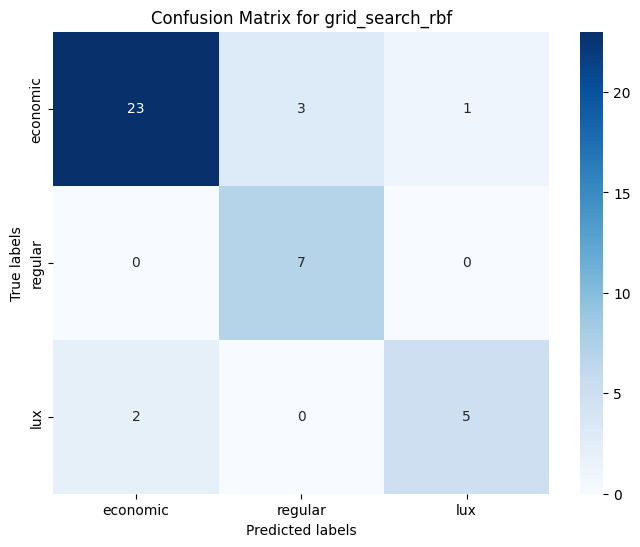

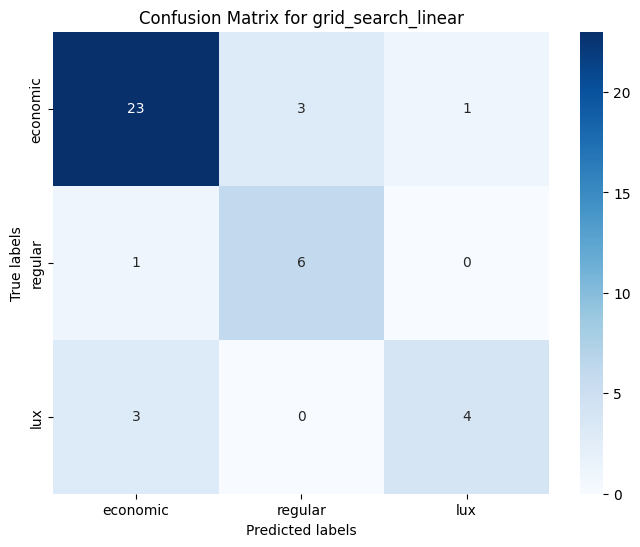

In [57]:
confusion_matrix_grid_rbf = confusion_matrix(df_test_label, best_model_grid_rbf.predict(df_test_features))
confussion_matrix_plotter(confusion_matrix_random_rbf, class_names, 'grid_search_rbf')

confusion_matrix_grid_linear = confusion_matrix(df_test_label, best_model_grid_linear.predict(df_test_features))
confussion_matrix_plotter(confusion_matrix_random_linear, class_names, 'grid_search_linear')

In [58]:
print(classification_report(df_test_label, best_model_grid_rbf.predict(df_test_features)))
print(classification_report(df_test_label, best_model_grid_linear.predict(df_test_features)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.70      1.00      0.82         7
           2       0.83      0.71      0.77         7

    accuracy                           0.85        41
   macro avg       0.82      0.86      0.83        41
weighted avg       0.87      0.85      0.85        41

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.67      0.86      0.75         7
           2       0.67      0.57      0.62         7

    accuracy                           0.78        41
   macro avg       0.73      0.75      0.73        41
weighted avg       0.78      0.78      0.78        41



**sources**

https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

https://www.questionpro.com/blog/categorical-data-vs-numerical-data/

https://www.simplilearn.com/normalization-vs-standardization-article

https://medium.com/@ayushmandurgapal/data-preprocessing-handling-categorical-variables-155c98de7dd6

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

https://encord.com/blog/train-val-test-split/

https://www.investopedia.com/terms/r/residual-sum-of-squares.asp

https://statisticsbyjim.com/regression/mean-squared-error-mse/

https://statisticsbyjim.com/regression/root-mean-square-error-rmse/

https://statisticsbyjim.com/regression/interpret-r-squared-regression/

https://www.kdnuggets.com/2022/09/decision-tree-pruning-hows-whys.html

https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

https://www.geeksforgeeks.org/using-a-hard-margin-vs-soft-margin-in-svm/